In [1]:
import requests
import json
import pandas as pd
import numpy as np
import dotenv
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime,timedelta

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')

In [2]:
carparks_df = pd.read_parquet('data/final_dataset.parquet')
carparks_df.head()

facility_id                   facility_name  capacity  occupancy  \
0            6  Gordon Henry St North Car Park       213         31   
1            6  Gordon Henry St North Car Park       213         30   
2            6  Gordon Henry St North Car Park       213         31   
3            6  Gordon Henry St North Car Park       213         32   
4            6  Gordon Henry St North Car Park       213         33   

   longitude    latitude  parking_availability       date                time  \
0 -33.756009  151.154528                   182 2023-07-01 2024-02-09 00:01:02   
1 -33.756009  151.154528                   183 2023-07-01 2024-02-09 00:21:32   
2 -33.756009  151.154528                   182 2023-07-01 2024-02-09 05:36:31   
3 -33.756009  151.154528                   181 2023-07-01 2024-02-09 05:51:02   
4 -33.756009  151.154528                   180 2023-07-01 2024-02-09 07:03:16   

  day_of_week time_category month is_holiday  
0    Saturday         Night  July         No  
1    Saturday         Night  July         No  
2    Saturday         Night  July         No  
3    Saturday         Night  July         No  
4    Saturday       Morning  July         No

In [3]:
# Extract the time part
carparks_df['time'] = carparks_df['time'].dt.time

# Drop the original 'datetime' column if needed
df = carparks_df.drop(columns=['time'])

carparks_df.head()

facility_id                   facility_name  capacity  occupancy  \
0            6  Gordon Henry St North Car Park       213         31   
1            6  Gordon Henry St North Car Park       213         30   
2            6  Gordon Henry St North Car Park       213         31   
3            6  Gordon Henry St North Car Park       213         32   
4            6  Gordon Henry St North Car Park       213         33   

   longitude    latitude  parking_availability       date      time  \
0 -33.756009  151.154528                   182 2023-07-01  00:01:02   
1 -33.756009  151.154528                   183 2023-07-01  00:21:32   
2 -33.756009  151.154528                   182 2023-07-01  05:36:31   
3 -33.756009  151.154528                   181 2023-07-01  05:51:02   
4 -33.756009  151.154528                   180 2023-07-01  07:03:16   

  day_of_week time_category month is_holiday  
0    Saturday         Night  July         No  
1    Saturday         Night  July         No  
2    Saturday         Night  July         No  
3    Saturday         Night  July         No  
4    Saturday       Morning  July         No

## DATA UNDERSTANDING

In [4]:
class DataUnderstanding:
    def __init__(self, df):
        self.df = df

    def examine_data(self):
        print(" ################### Details about the data ################### \n ")
        print(f"The dataset is a DataFrame with {self.df.shape[0]} rows and {self.df.shape[1]} columns\n")
        print("Columns of the dataset:", self.df.columns.to_list())
        print("\nFirst 5 records of the dataset ")
        display(self.df.head())
        # Display information about the dataset
        print("\nData information")
        display(self.df.info())
        print("\nNull Values ")
        display(self.df.isnull().sum())
        print("\nDuplicate Values ")
        print(self.df.duplicated().sum(), 'duplicate values')
        display(self.df.describe())
        print('\nData Details')
        print(f'Number of unique Parking Facilities:', carparks_df.facility_name.nunique())
        print(f'Number of unique days:', carparks_df.date.nunique())
        print(f'Total parking spaces in all facilities:', carparks_df.drop_duplicates('facility_id', 
                                                                    keep='first')[['capacity']].sum())

# Instantiate the DataUnderstanding class
data_understanding = DataUnderstanding(carparks_df)

# Replace "movie_rating_df" with your actual dataframe
data_understanding.examine_data()

 ################### Details about the data ################### 
 
The dataset is a DataFrame with 2924545 rows and 13 columns

Columns of the dataset: ['facility_id', 'facility_name', 'capacity', 'occupancy', 'longitude', 'latitude', 'parking_availability', 'date', 'time', 'day_of_week', 'time_category', 'month', 'is_holiday']

First 5 records of the dataset 


facility_id                   facility_name  capacity  occupancy  \
0            6  Gordon Henry St North Car Park       213         31   
1            6  Gordon Henry St North Car Park       213         30   
2            6  Gordon Henry St North Car Park       213         31   
3            6  Gordon Henry St North Car Park       213         32   
4            6  Gordon Henry St North Car Park       213         33   

   longitude    latitude  parking_availability       date      time  \
0 -33.756009  151.154528                   182 2023-07-01  00:01:02   
1 -33.756009  151.154528                   183 2023-07-01  00:21:32   
2 -33.756009  151.154528                   182 2023-07-01  05:36:31   
3 -33.756009  151.154528                   181 2023-07-01  05:51:02   
4 -33.756009  151.154528                   180 2023-07-01  07:03:16   

  day_of_week time_category month is_holiday  
0    Saturday         Night  July         No  
1    Saturday         Night  July         No  
2    Saturday         Night  July         No  
3    Saturday         Night  July         No  
4    Saturday       Morning  July         No


Data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924545 entries, 0 to 2924544
Data columns (total 13 columns):
 #   Column                Dtype         
---  ------                -----         
 0   facility_id           int32         
 1   facility_name         object        
 2   capacity              int32         
 3   occupancy             int32         
 4   longitude             float64       
 5   latitude              float64       
 6   parking_availability  int32         
 7   date                  datetime64[ns]
 8   time                  object        
 9   day_of_week           object        
 10  time_category         object        
 11  month                 object        
 12  is_holiday            object        
dtypes: datetime64[ns](1), float64(2), int32(4), object(6)
memory usage: 245.4+ MB


None


Null Values 


facility_id             0
facility_name           0
capacity                0
occupancy               0
longitude               0
latitude                0
parking_availability    0
date                    0
time                    0
day_of_week             0
time_category           0
month                   0
is_holiday              0
dtype: int64


Duplicate Values 
119 duplicate values


facility_id      capacity     occupancy     longitude      latitude  \
count  2.924545e+06  2.924545e+06  2.924545e+06  2.924545e+06  2.924545e+06   
mean   2.013059e+01  7.663994e+02  2.734978e+02 -3.378610e+01  1.509636e+02   
min    6.000000e+00  4.200000e+01 -2.420000e+02 -3.467252e+01  1.506961e+02   
25%    1.500000e+01  3.730000e+02  6.800000e+01 -3.395246e+01  1.508587e+02   
50%    2.000000e+01  7.000000e+02  1.940000e+02 -3.375006e+01  1.509350e+02   
75%    2.700000e+01  1.057000e+03  4.090000e+02 -3.370448e+01  1.510572e+02   
max    3.300000e+01  1.884000e+03  1.572000e+03 -3.342388e+01  1.513417e+02   
std    7.783199e+00  5.052506e+02  2.558503e+02  1.637207e-01  1.772618e-01   

       parking_availability                           date  
count          2.924545e+06                        2924545  
mean           4.929017e+02  2023-10-08 19:57:47.770200064  
min           -1.070000e+02            2023-07-01 00:00:00  
25%            1.200000e+02            2023-09-01 00:00:00  
50%            3.990000e+02            2023-10-13 00:00:00  
75%            7.490000e+02            2023-11-19 00:00:00  
max            1.884000e+03            2023-12-31 00:00:00  
std            4.306198e+02                            NaN


Data Details
Number of unique Parking Facilities: 28
Number of unique days: 184
Total parking spaces in all facilities: capacity    14588
dtype: int64


In [5]:
# Drop the duplicate entries
processed_df = carparks_df.drop_duplicates()
processed_df


facility_id                   facility_name  capacity  occupancy  \
0                  6  Gordon Henry St North Car Park       213         31   
1                  6  Gordon Henry St North Car Park       213         30   
2                  6  Gordon Henry St North Car Park       213         31   
3                  6  Gordon Henry St North Car Park       213         32   
4                  6  Gordon Henry St North Car Park       213         33   
...              ...                             ...       ...        ...   
2924540           33            Cherrybrook Car Park       384        272   
2924541           33            Cherrybrook Car Park       384        271   
2924542           33            Cherrybrook Car Park       384        270   
2924543           33            Cherrybrook Car Park       384        269   
2924544           33            Cherrybrook Car Park       384        269   

         longitude    latitude  parking_availability       date      time  \
0       -33.756009  151.154528                   182 2023-07-01  00:01:02   
1       -33.756009  151.154528                   183 2023-07-01  00:21:32   
2       -33.756009  151.154528                   182 2023-07-01  05:36:31   
3       -33.756009  151.154528                   181 2023-07-01  05:51:02   
4       -33.756009  151.154528                   180 2023-07-01  07:03:16   
...            ...         ...                   ...        ...       ...   
2924540 -33.736703  151.031977                   112 2023-12-31  23:42:10   
2924541 -33.736703  151.031977                   113 2023-12-31  23:44:36   
2924542 -33.736703  151.031977                   114 2023-12-31  23:45:39   
2924543 -33.736703  151.031977                   115 2023-12-31  23:48:35   
2924544 -33.736703  151.031977                   115 2023-12-31  23:58:35   

        day_of_week time_category     month is_holiday  
0          Saturday         Night      July         No  
1          Saturday         Night      July         No  
2          Saturday         Night      July         No  
3          Saturday         Night      July         No  
4          Saturday       Morning      July         No  
...             ...           ...       ...        ...  
2924540      Sunday       Evening  December         No  
2924541      Sunday       Evening  December         No  
2924542      Sunday       Evening  December         No  
2924543      Sunday       Evening  December         No  
2924544      Sunday       Evening  December         No  

[2924426 rows x 13 columns]

## EXPLORATORY DATA ANALYSIS

In this section, through a combination of visualizations, statistical summaries, and data manipulation techniques, we delve into the dataset's intricacies, examining the distribution of variables, identifying correlations, and detecting anomalies. By thoroughly exploring the data's structure and characteristics, we aim to gain a deeper understanding of its underlying properties, paving the way for informed hypotheses and refined analysis strategies.

### Univariate Data Analysis

The distribution of the numerical columns is visualized below using distribution plots (histogram with KDE) and boxplots.

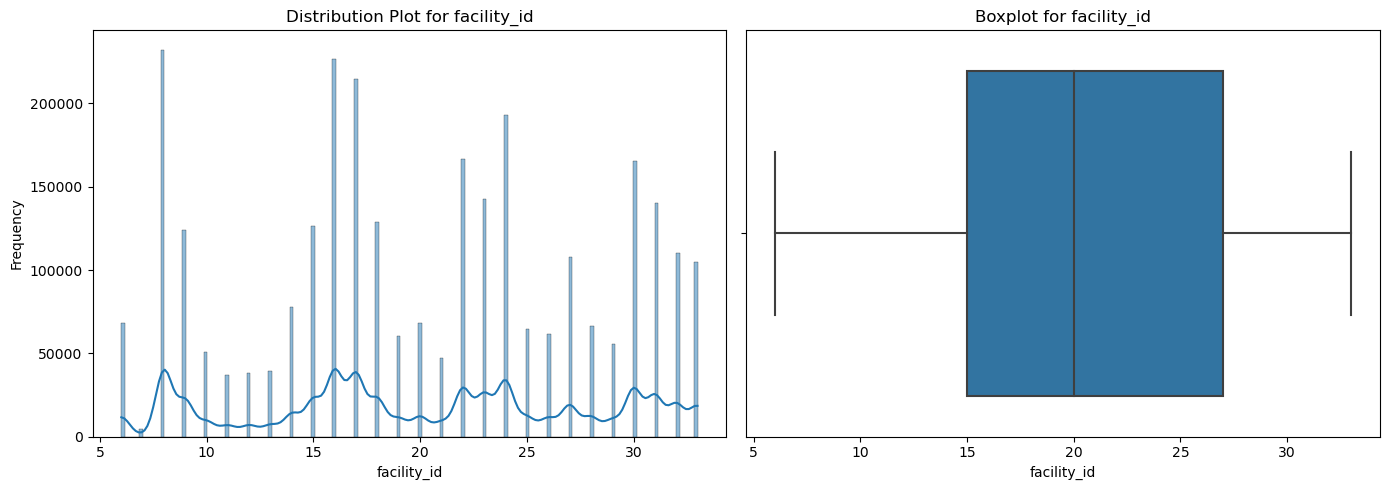

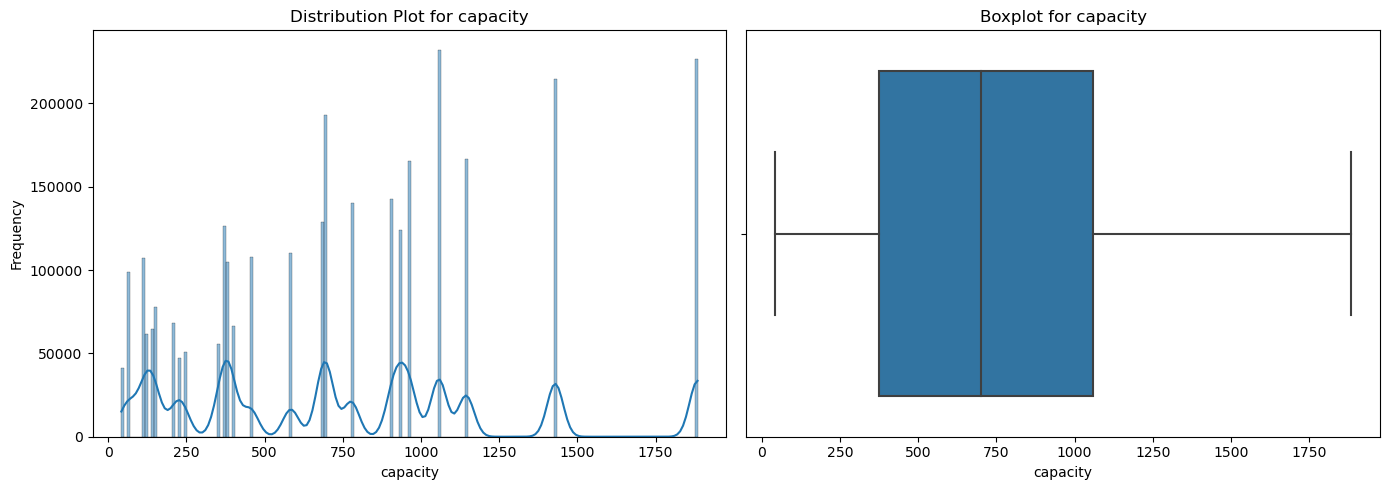

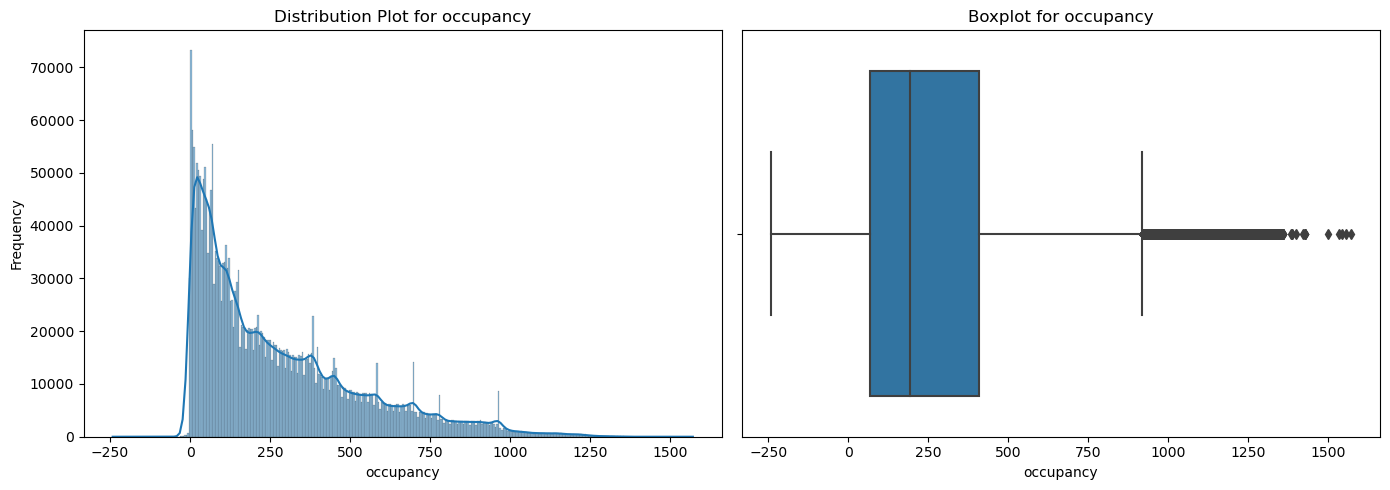

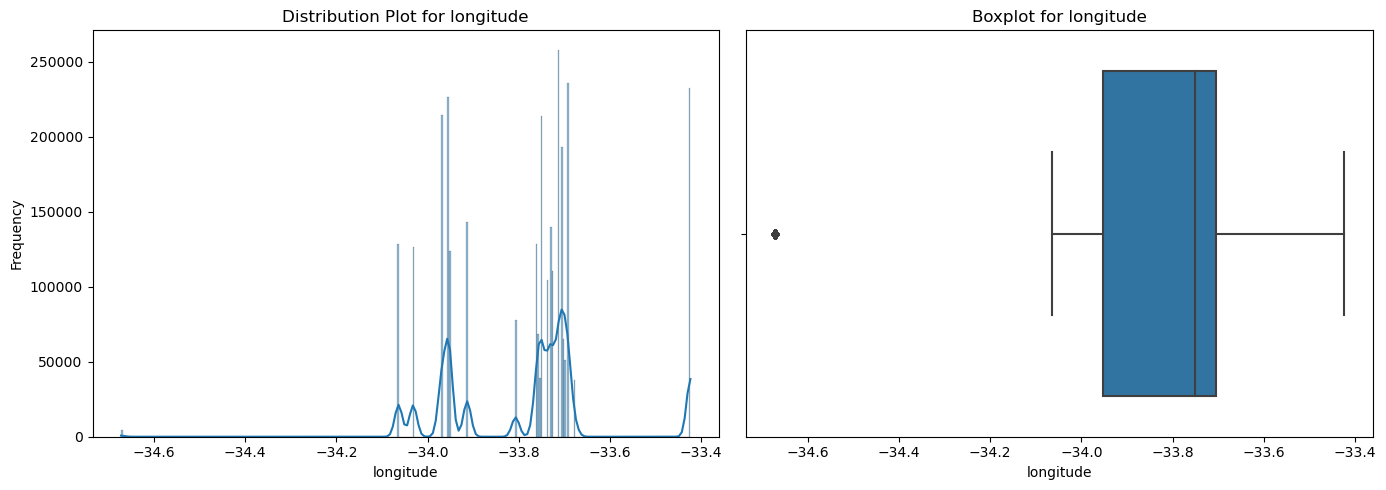

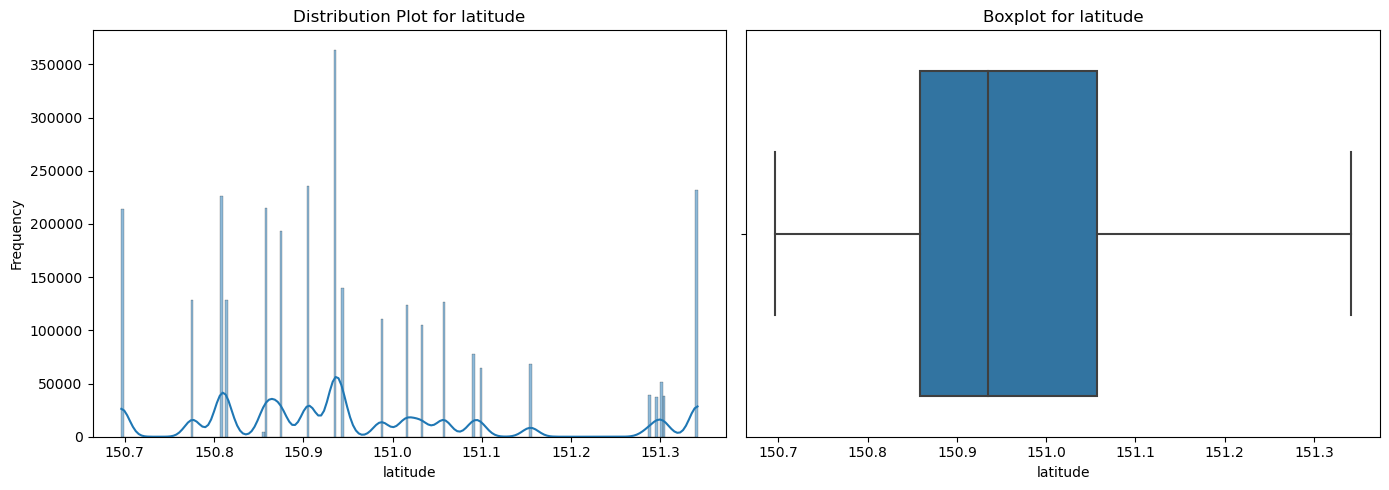

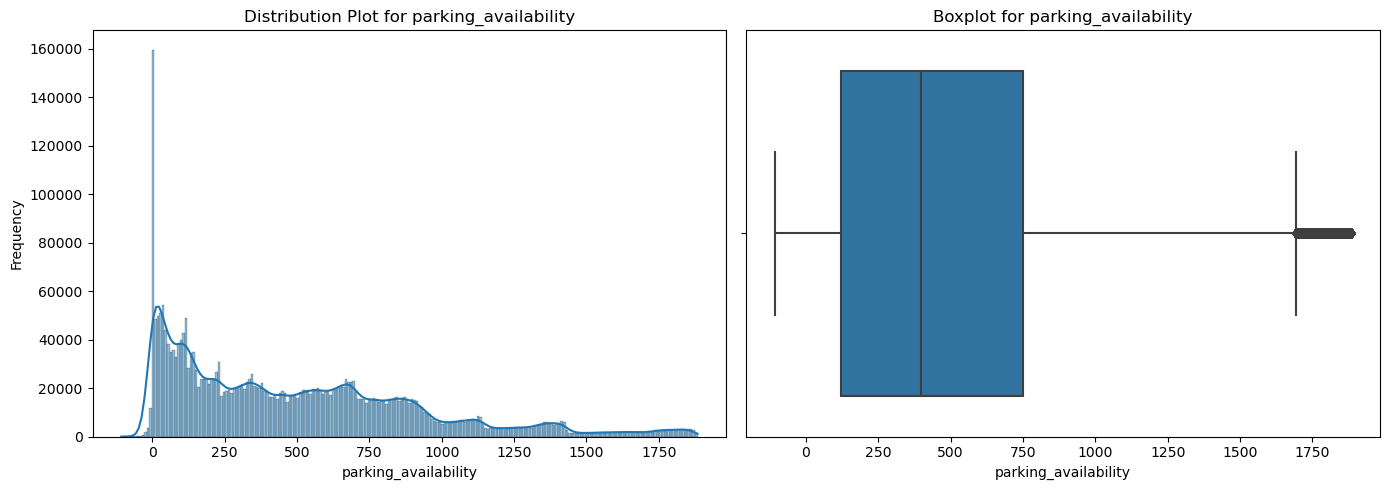

In [30]:
# Function to create various distribution plots for numeriacal columns
def create_distribution_plots(dataframe):
    # Check if the input is a DataFrame
    if not isinstance(dataframe, pd.DataFrame):
        raise ValueError("Input is not a DataFrame.")

    # Loop through each column in the DataFrame
    for column in dataframe.columns:
        # Check if the column is numerical
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            # Create a figure with subplots
            fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

            # Histogram with KDE
            sns.histplot(dataframe[column], kde=True, ax=axes[0])
            axes[0].set_title(f'Distribution Plot for {column}')
            axes[0].set_xlabel(column)
            axes[0].set_ylabel('Frequency')

            # Boxplot
            sns.boxplot(x=dataframe[column], ax=axes[1])
            axes[1].set_title(f'Boxplot for {column}')
            axes[1].set_xlabel(column)
            axes[1].set_ylabel('')

            plt.tight_layout()
            plt.show()


create_distribution_plots(processed_df)

### Count Plot of Non-Holidays and Holidays from July to December

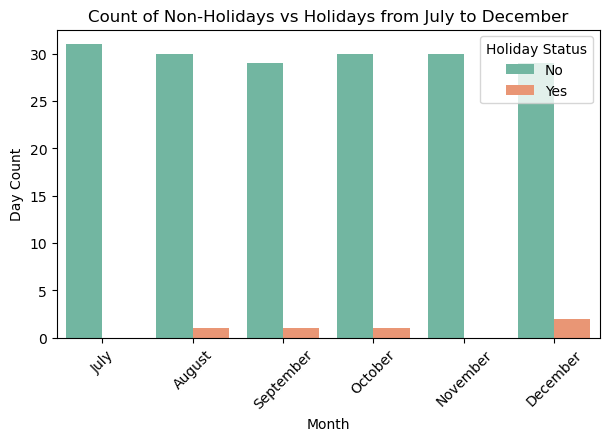

In [35]:
final_df = processed_df

# Define the order of months from July to December
month_order = ['July', 'August', 'September', 'October', 'November', 'December']

# Convert 'month' column to categorical with specified order
final_df['month'] = pd.Categorical(final_df['month'], categories=month_order, ordered=True)

# Group by 'Month' and 'is_holiday' columns and count the occurrences
holiday_counts = final_df.groupby(['month', 'is_holiday'])['date'].nunique().reset_index(name='Count')

# Create a countplot
plt.figure(figsize=(7, 4))
sns.barplot(x='month', y='Count', hue='is_holiday', data=holiday_counts, palette='Set2')
plt.title('Count of Non-Holidays vs Holidays from July to December')
plt.xlabel('Month')
plt.ylabel('Day Count')
plt.xticks(rotation=45)
plt.legend(title='Holiday Status')
plt.show()

### Bivariate Analysis

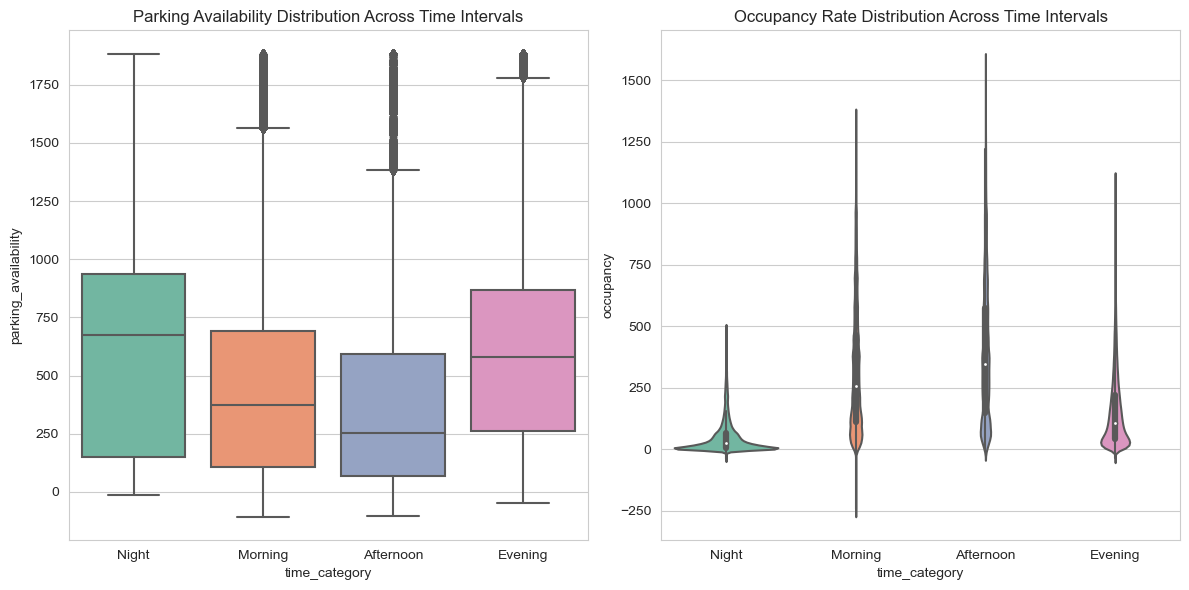

In [52]:
# Create a side-by-side boxplot or violin plot
plt.figure(figsize=(12, 6))

# Side-by-side boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='time_category', y='parking_availability',
            data=processed_df, palette='Set2')
plt.title('Parking Availability Distribution Across Time Intervals')

# Side-by-side violin plot
plt.subplot(1, 2, 2)
sns.violinplot(x='time_category', y='occupancy',
               data=processed_df, palette='Set2')
plt.title('Occupancy Rate Distribution Across Time Intervals')

plt.tight_layout()
plt.show()

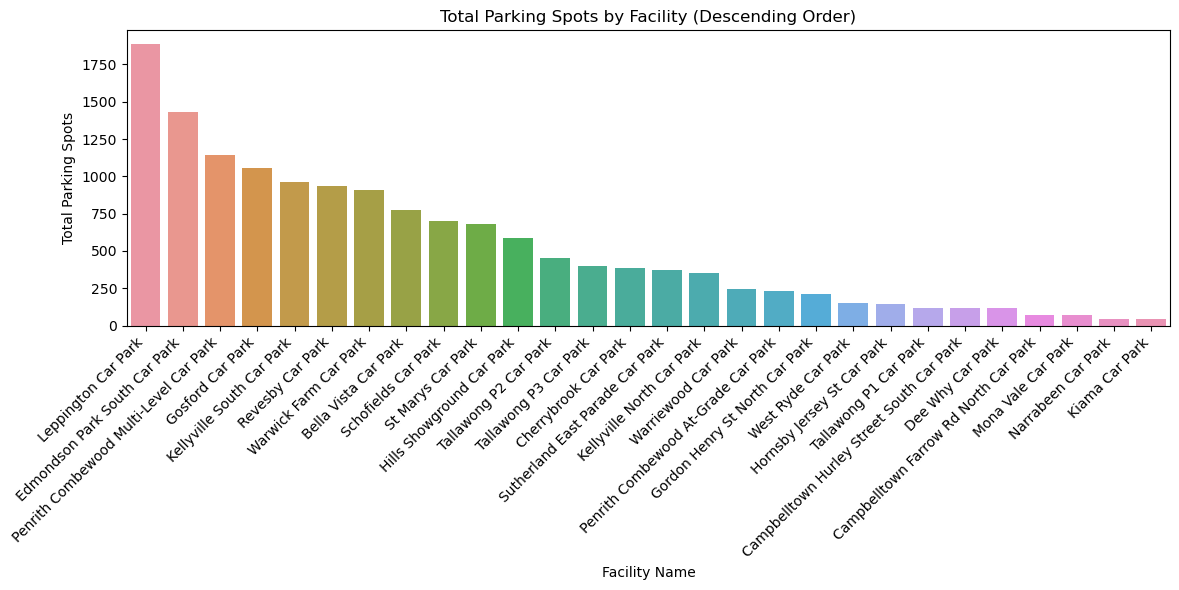

In [34]:
# Group by facility name and sum the total parking spots
facility_parking_spots = final_df.groupby('facility_name')['capacity'].first().reset_index()

# Sort the DataFrame by total parking spots in descending order
facility_parking_spots = facility_parking_spots.sort_values(by='capacity', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='facility_name', y='capacity', data=facility_parking_spots)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Facility Name')
plt.ylabel('Total Parking Spots')
plt.title('Total Parking Spots by Facility (Descending Order)')
plt.tight_layout()
plt.show()

#### Monthly Average Parking Occupancy for all the Facilities

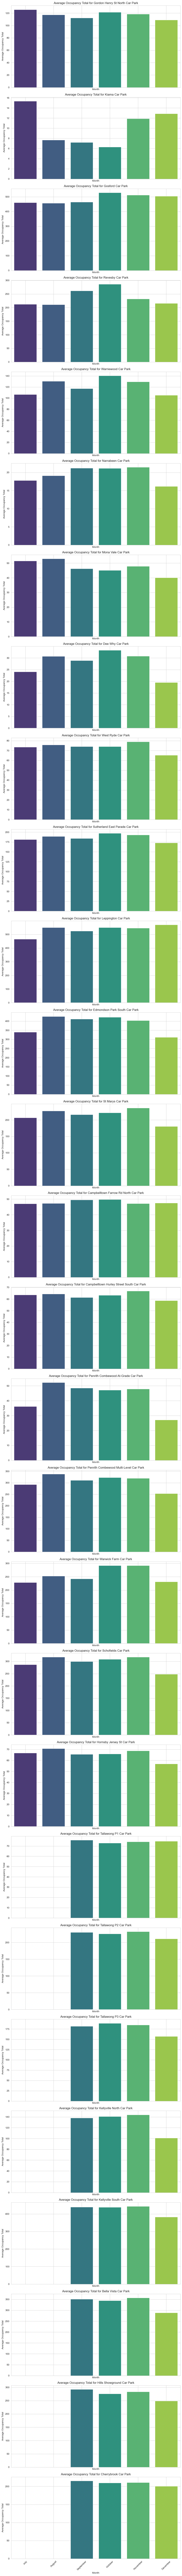

In [36]:
# List of unique facility names
facility_names = final_df['facility_name'].unique()

# Set the style of the plot
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=len(facility_names), ncols=1, figsize=(10, len(facility_names) * 5), sharex=True)

# Iterate over each facility name
for i, facility_name in enumerate(facility_names):
    # Filter data for the current facility
    facility_data = final_df[final_df['facility_name'] == facility_name]
    
    # Group the data by month and calculate the average occupancy total
    facility_month_avg = facility_data.groupby('month')['occupancy'].mean().reset_index()
    
    # Create bar plot for the current facility
    sns.barplot(data=facility_month_avg, x='month', y='occupancy', palette='viridis', ax=axes[i])
    
    # Set title and labels for the current subplot
    axes[i].set_title(f'Average Occupancy Total for {facility_name}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Average Occupancy Total')
    axes[i].set_xticks(range(6))
    axes[i].set_xticklabels(['July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
    axes[i].tick_params(axis='x', labelrotation=45)
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

#### Parking Availability of all the Facilities across the 6 Months

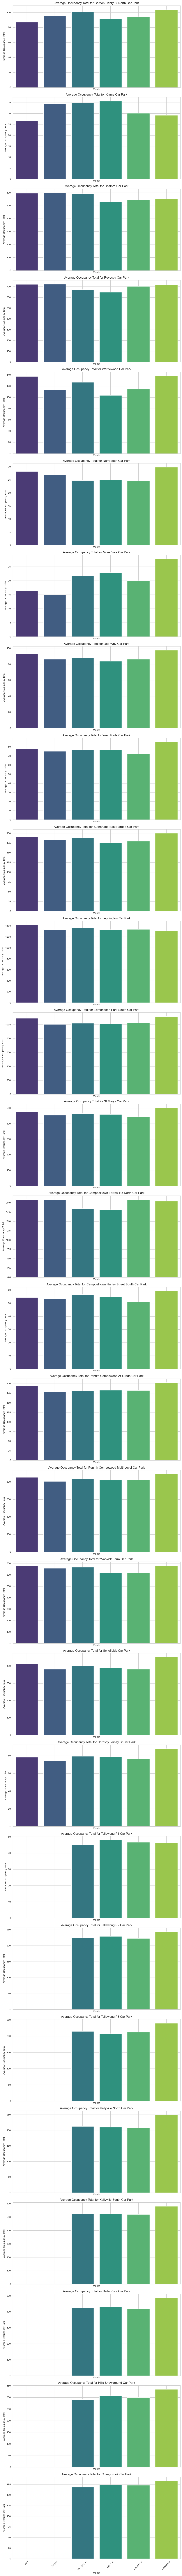

In [46]:
# List of unique facility names
facility_names = final_df['facility_name'].unique()

# Set the style of the plot
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=len(facility_names), ncols=1, figsize=(10, len(facility_names) * 5), sharex=True)

# Iterate over each facility name
for i, facility_name in enumerate(facility_names):
    # Filter data for the current facility
    facility_data = final_df[final_df['facility_name'] == facility_name]
    
    # Group the data by month and calculate the average occupancy total
    facility_month_avg = facility_data.groupby('month')['parking_availability'].mean().reset_index()
    
    # Create bar plot for the current facility
    sns.barplot(data=facility_month_avg, x='month', y='parking_availability', palette='viridis', ax=axes[i])
    
    # Set title and labels for the current subplot
    axes[i].set_title(f'Average Occupancy Total for {facility_name}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Average Occupancy Total')
    axes[i].set_xticks(range(6))
    axes[i].set_xticklabels(['July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
    axes[i].tick_params(axis='x', labelrotation=45)
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

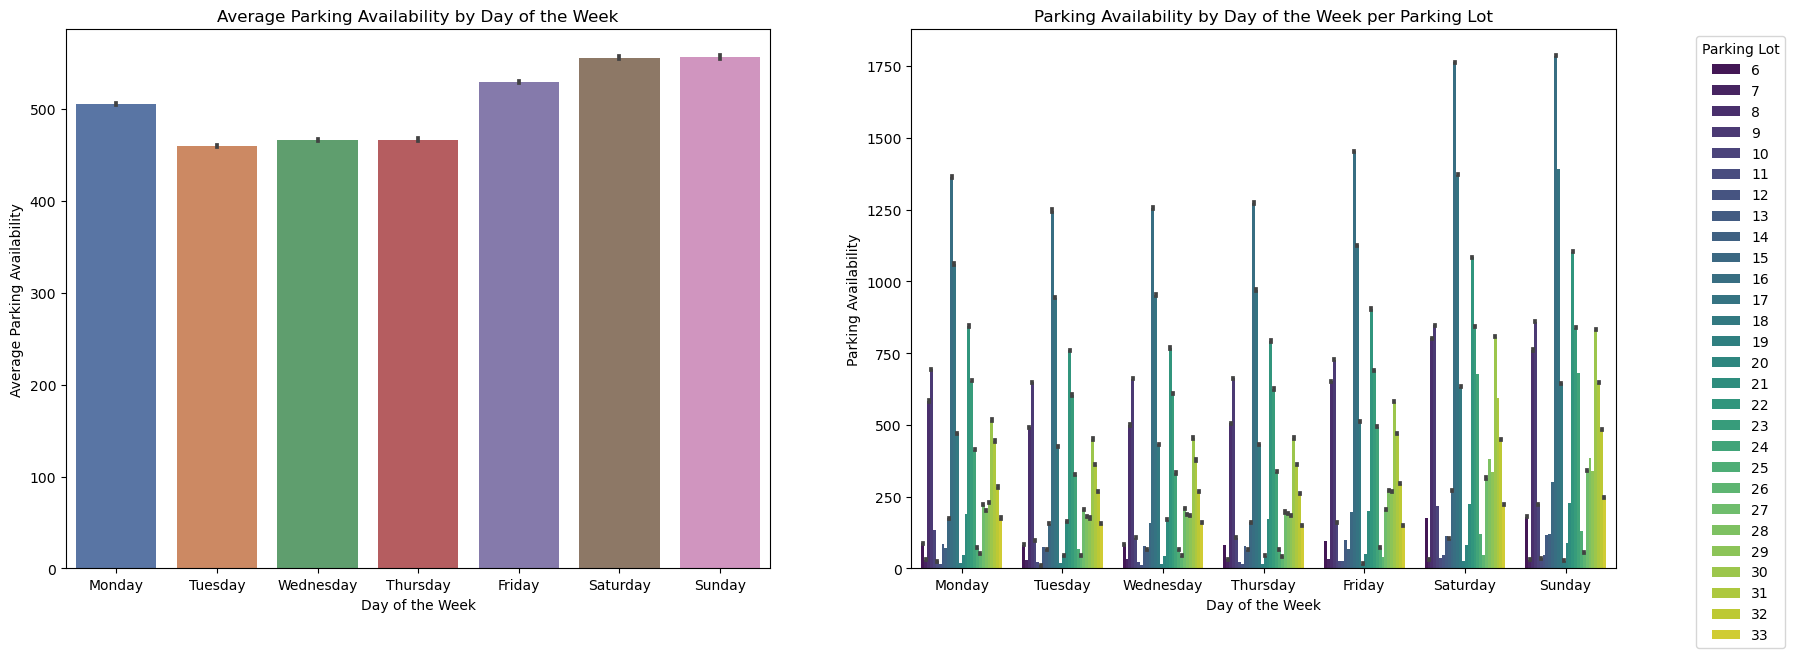

In [20]:
# Bar plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))

# Order of days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.barplot(x='day_of_week', y='parking_availability', ax=axes[0],
            data=processed_df, palette='deep', order = day_order)
axes[0].set_title('Average Parking Availability by Day of the Week')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Average Parking Availability')

sns.barplot(x='day_of_week', y='parking_availability', ax=axes[1],
            data=processed_df, palette='viridis', hue='facility_id', order = day_order)
axes[1].set_title('Parking Availability by Day of the Week per Parking Facility')  # Corrected line
axes[1].set_xlabel('Day of the Week')  # Corrected line
axes[1].set_ylabel('Parking Availability')  # Corrected line
axes[1].legend(title='Parking Facility', loc='upper right', bbox_to_anchor=(1.25, 1))  # Adjust the values as needed
plt.show()  # Corrected line

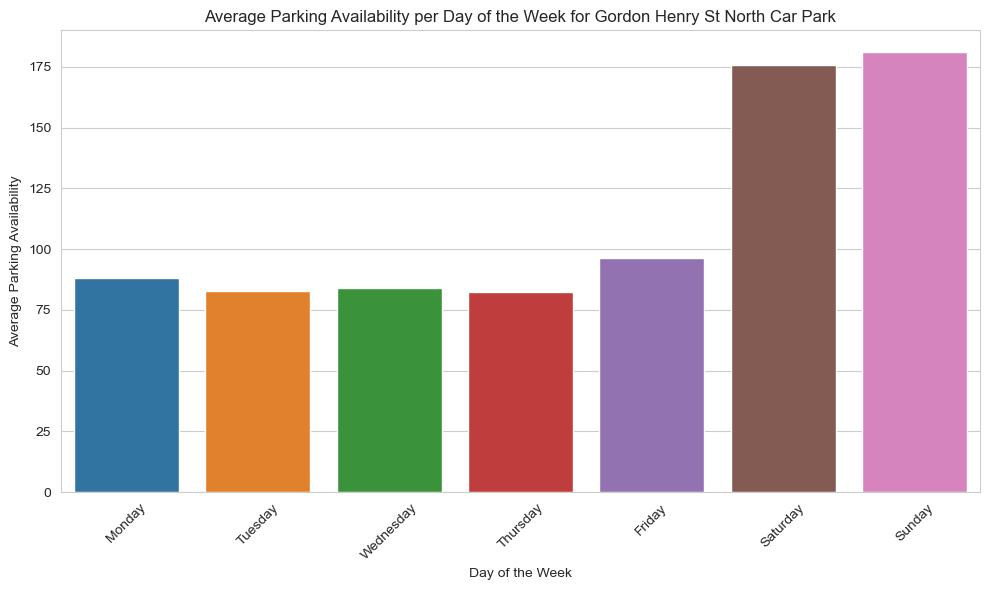

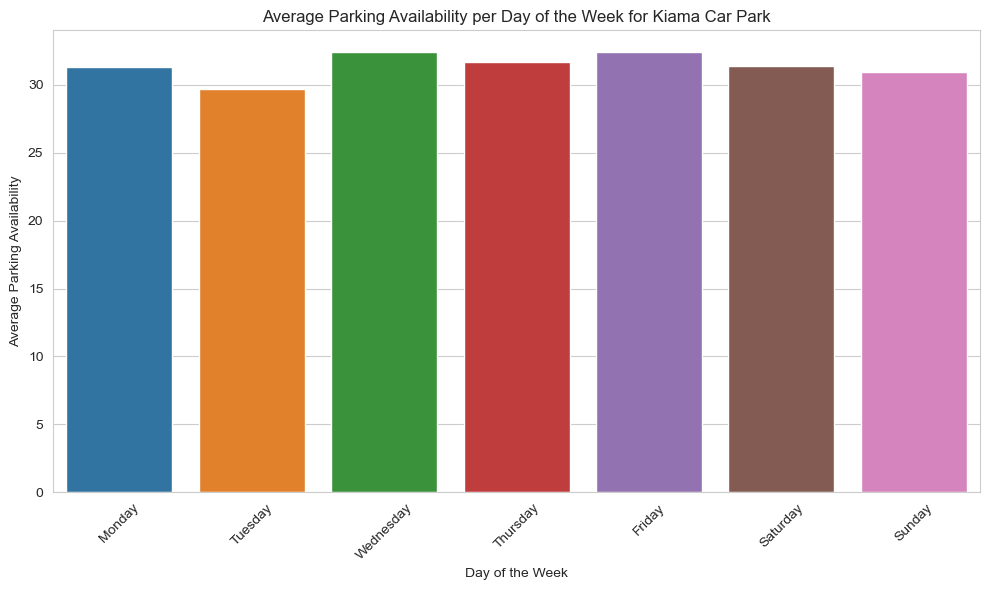

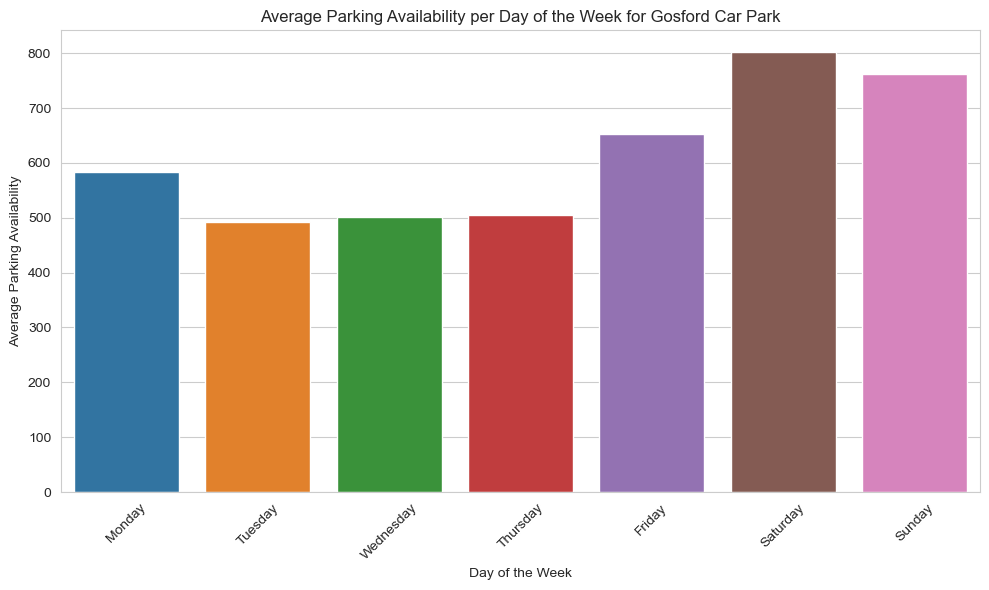

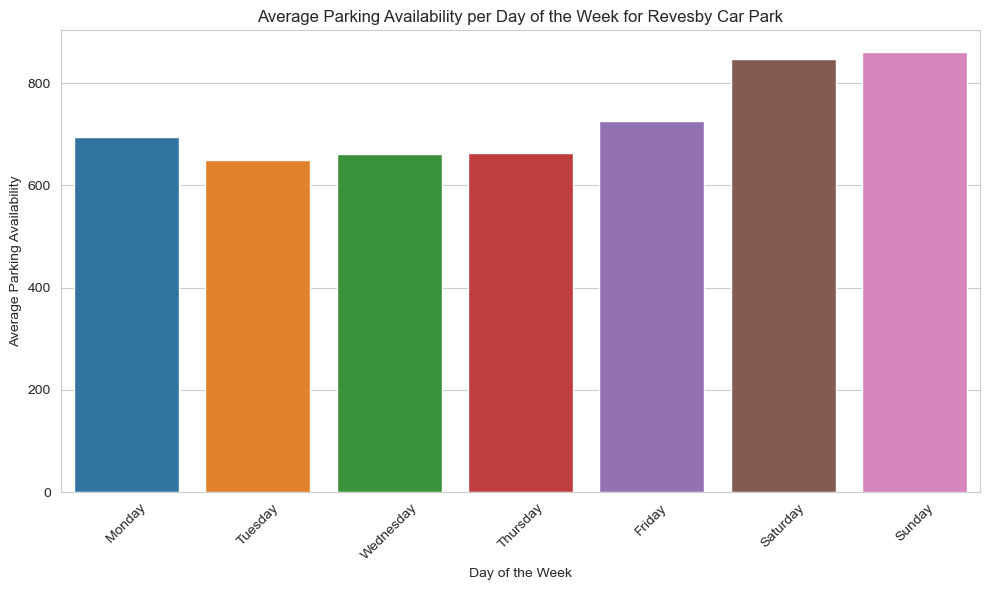

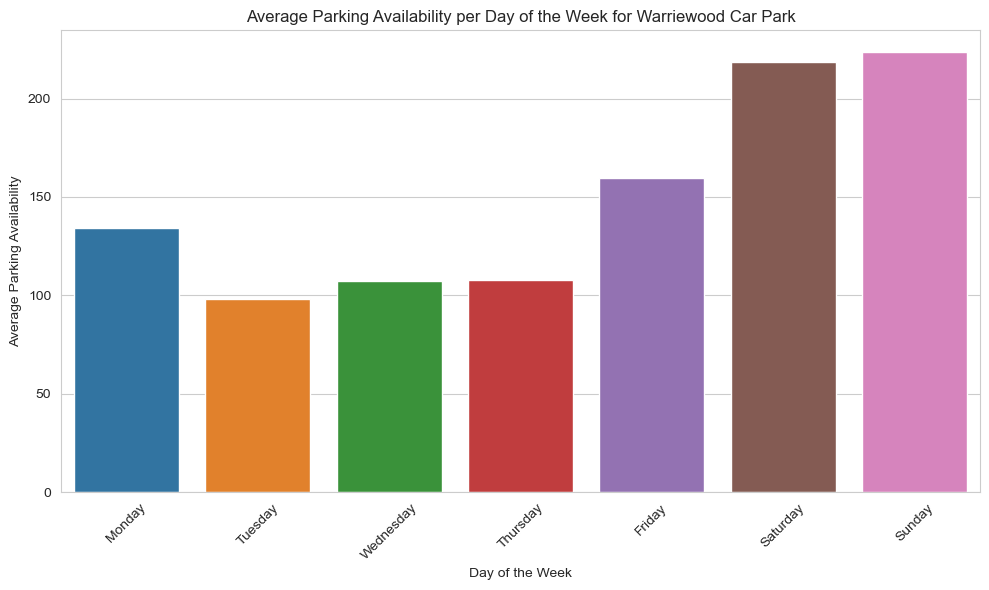

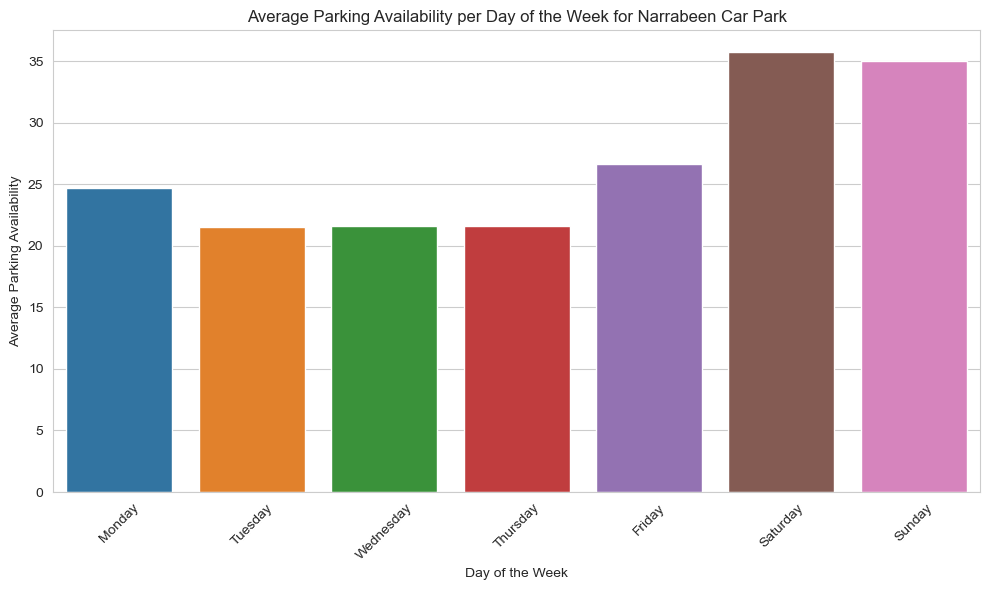

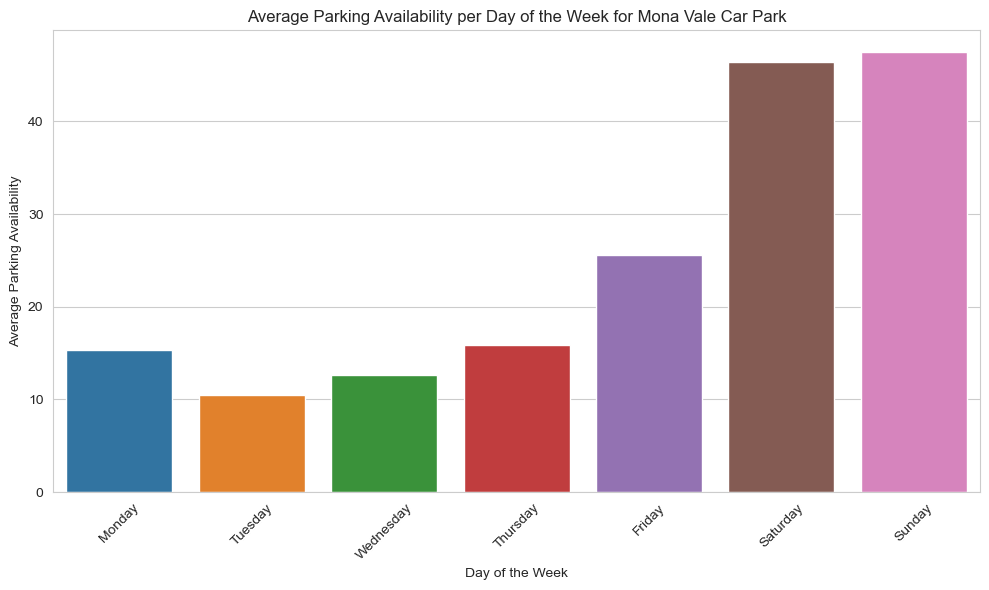

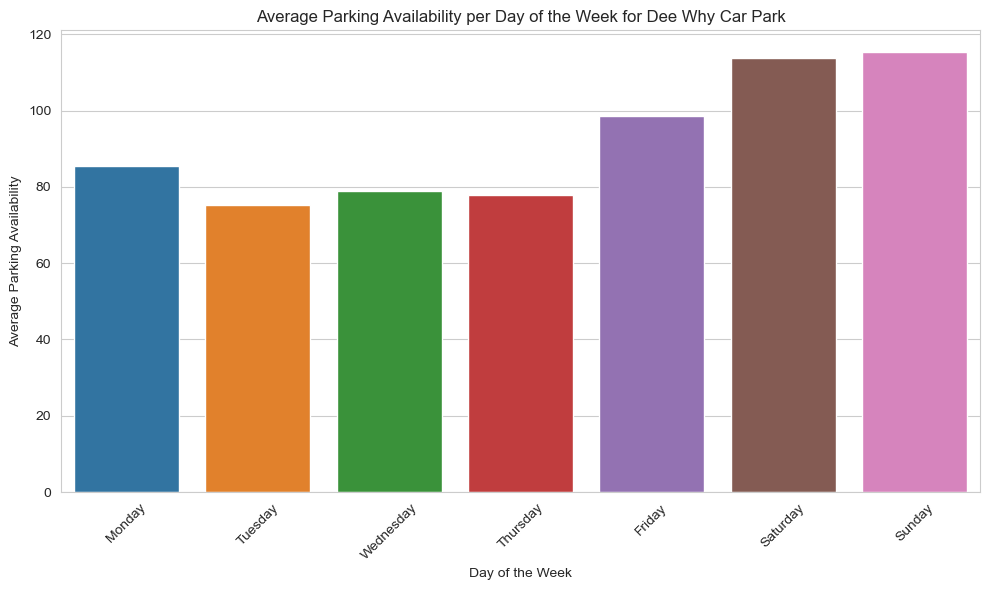

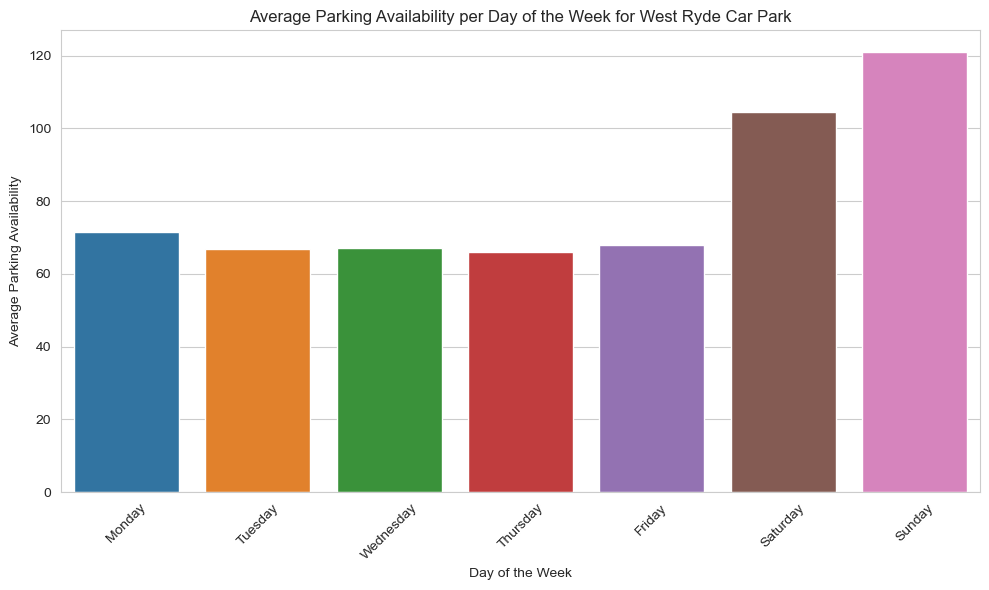

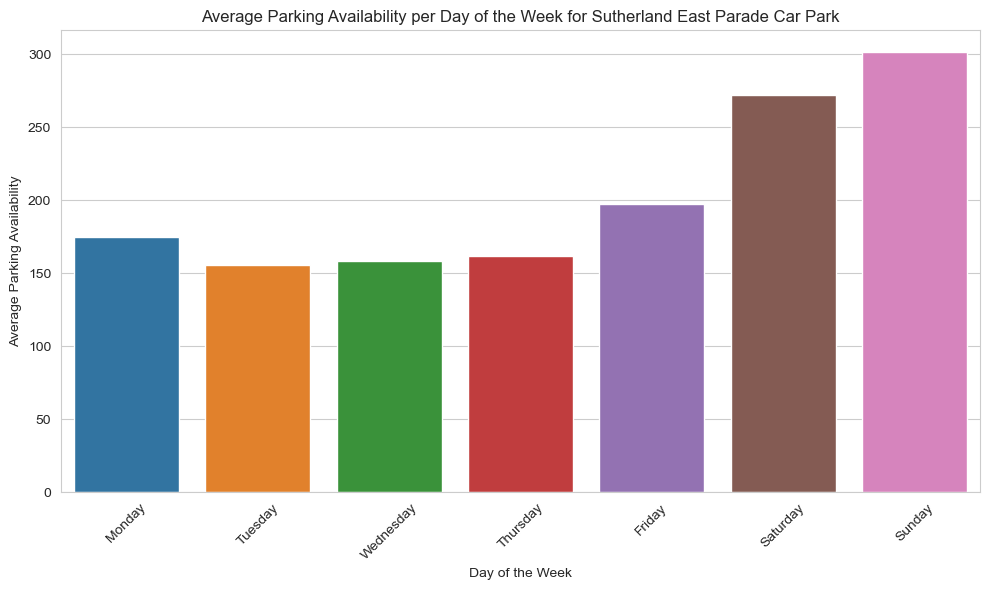

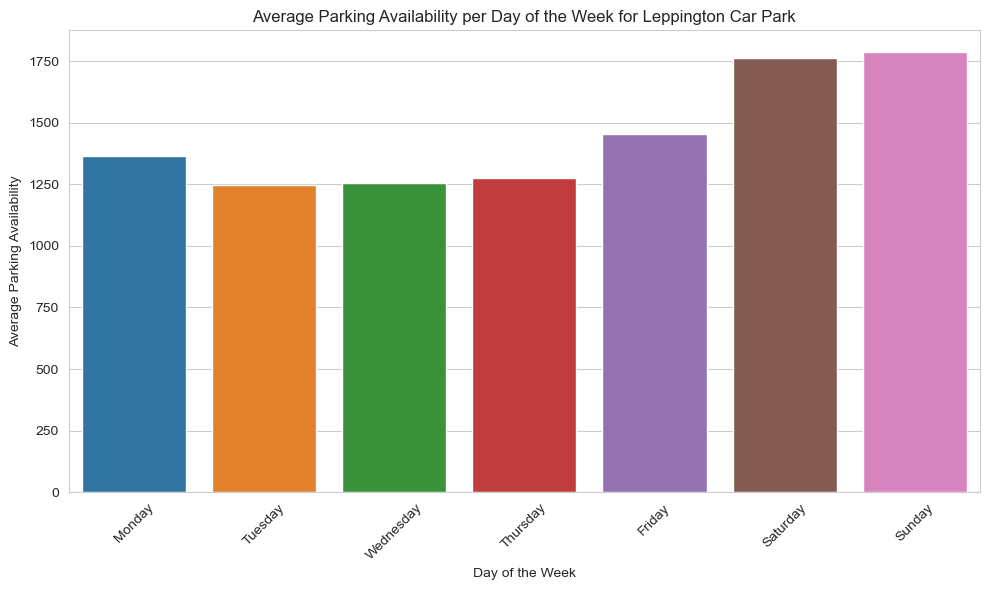

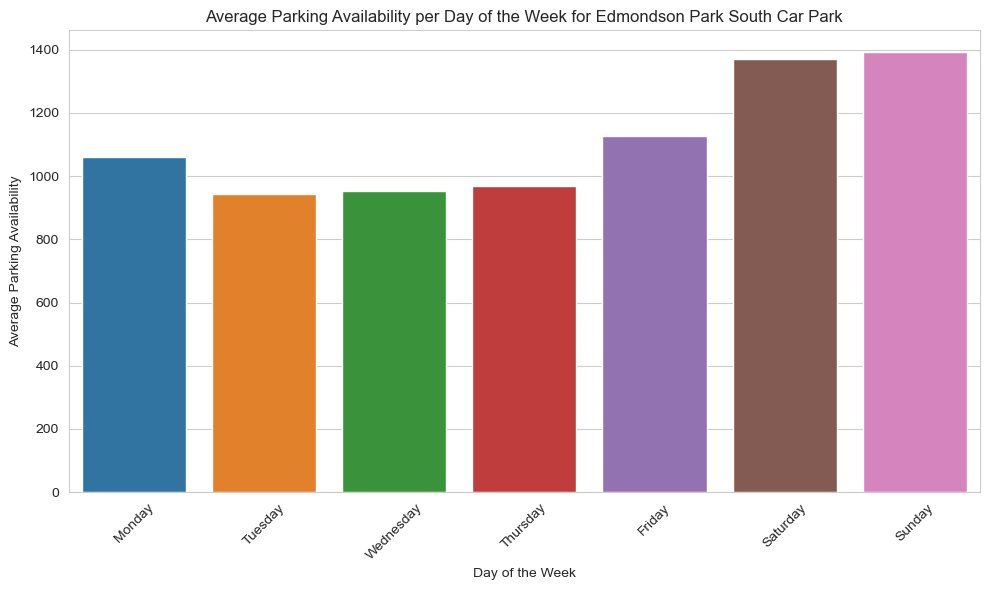

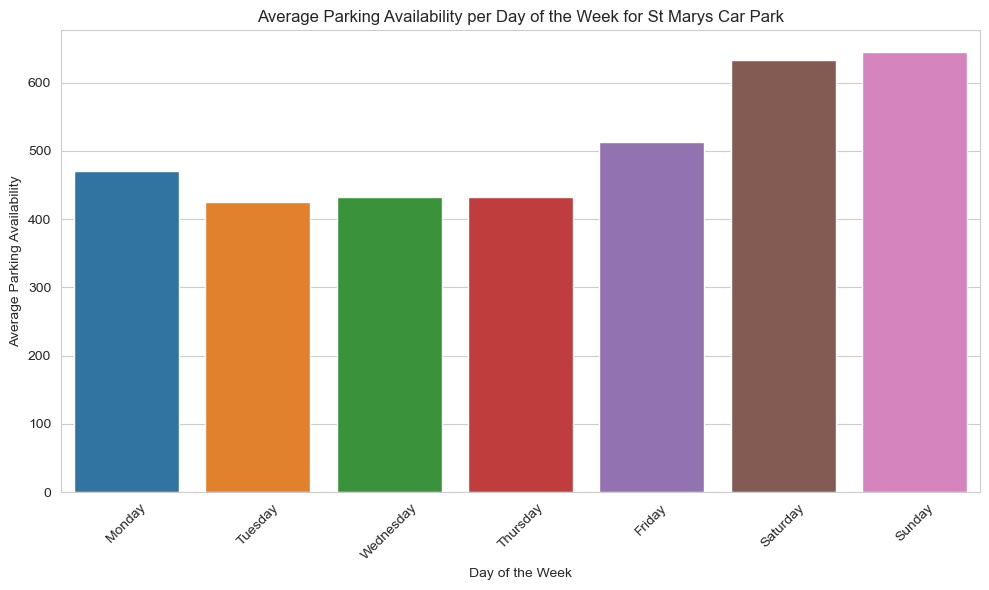

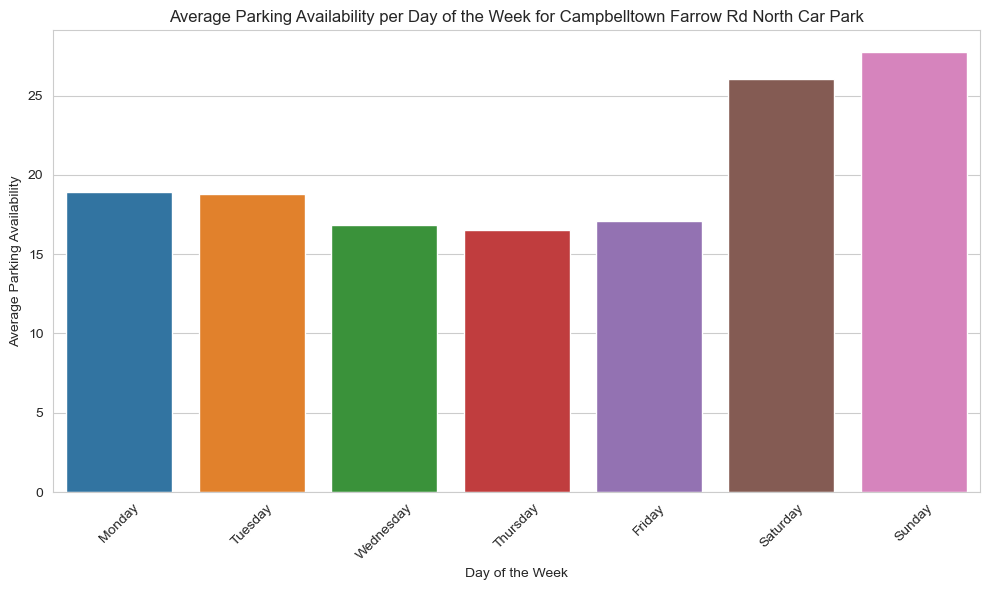

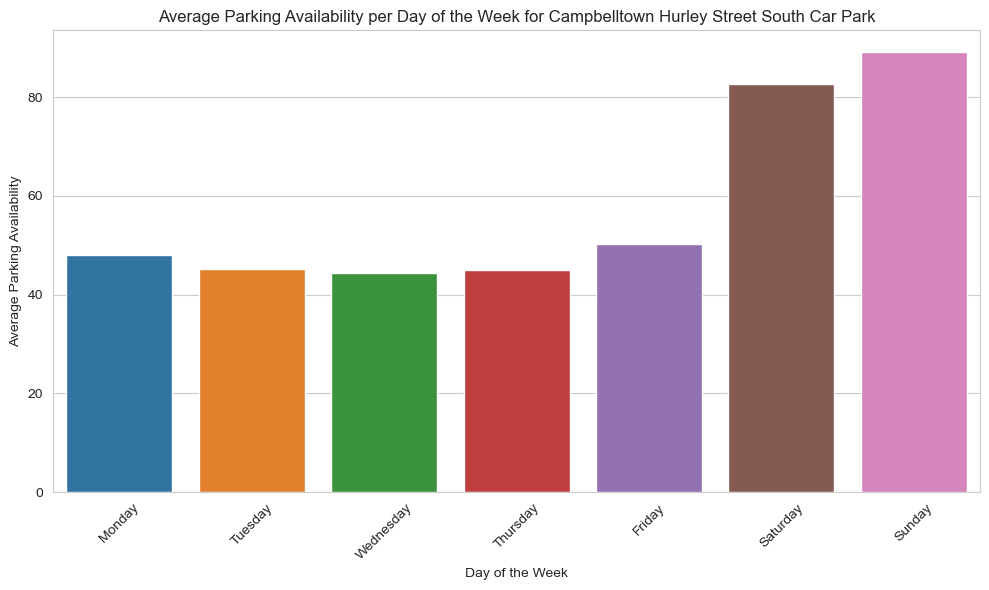

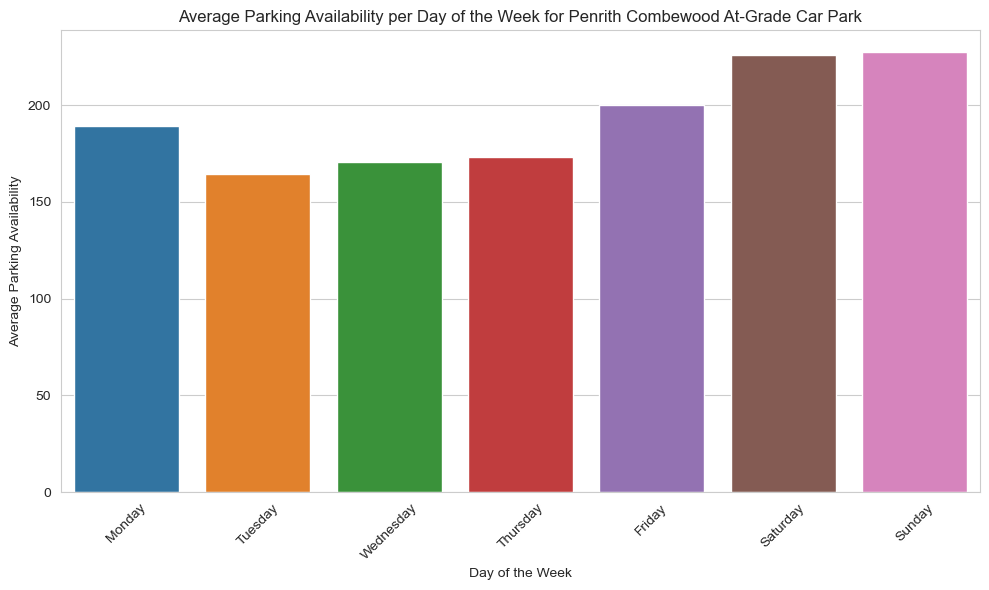

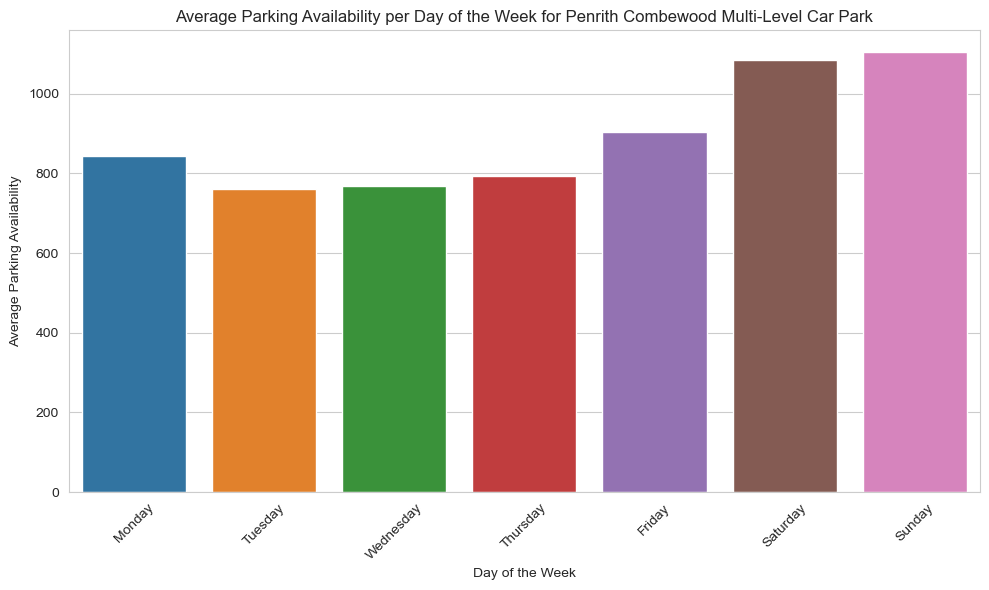

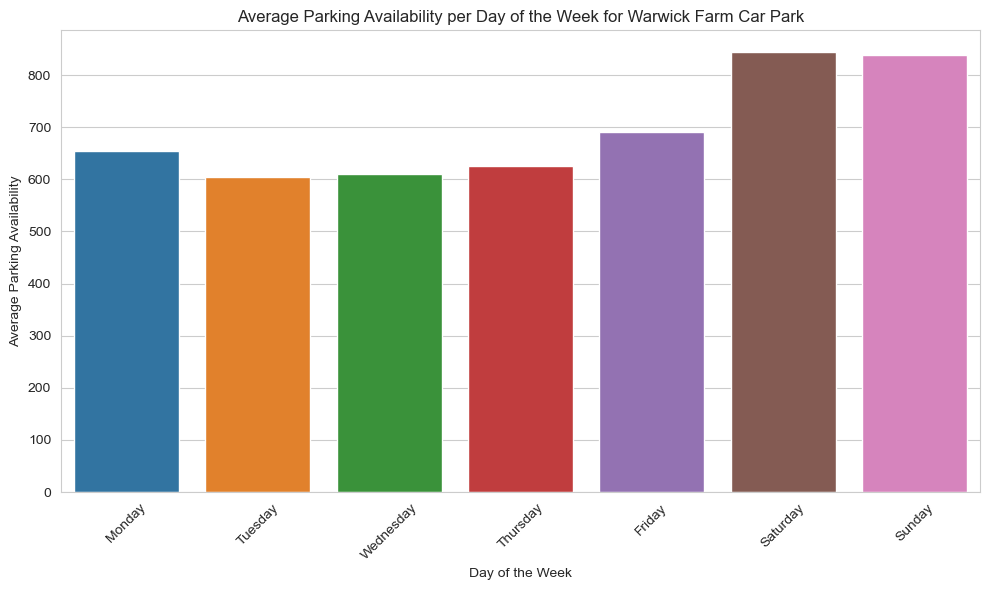

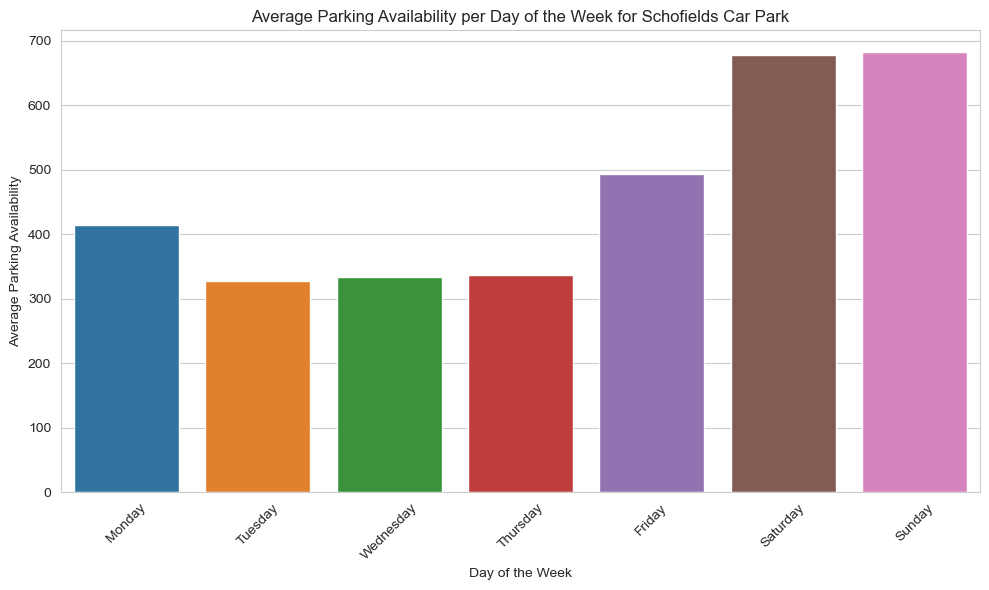

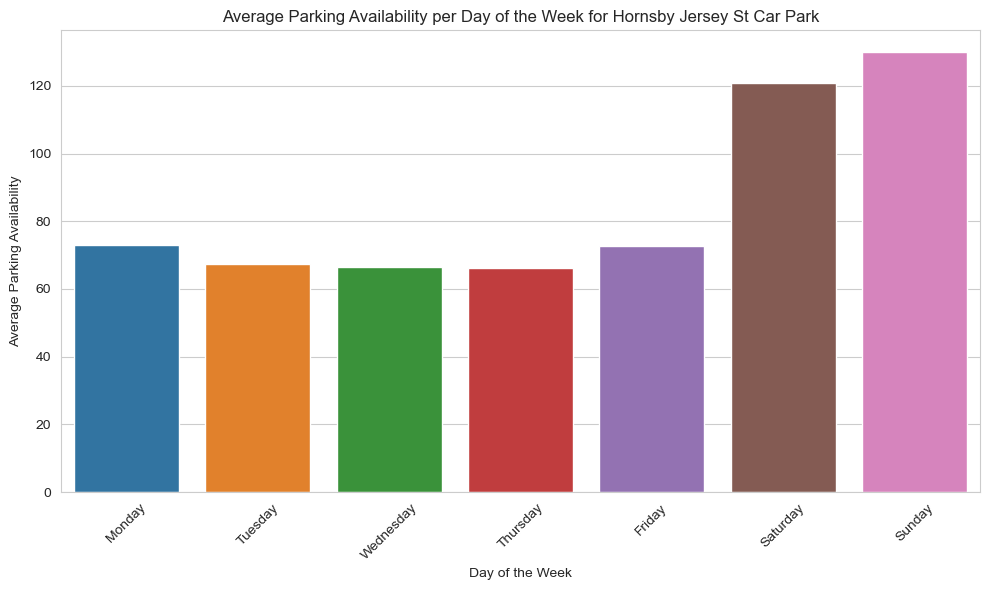

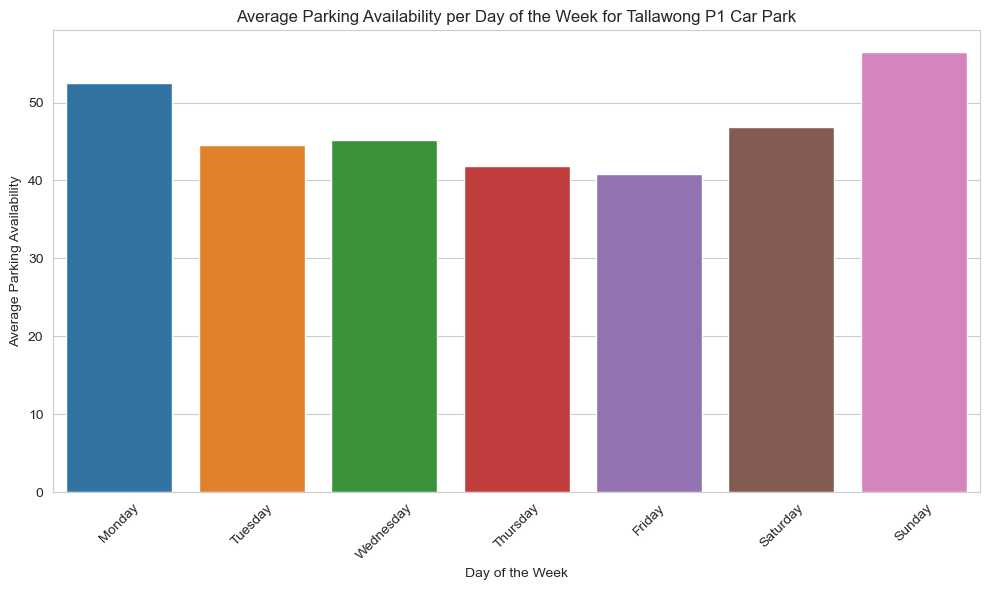

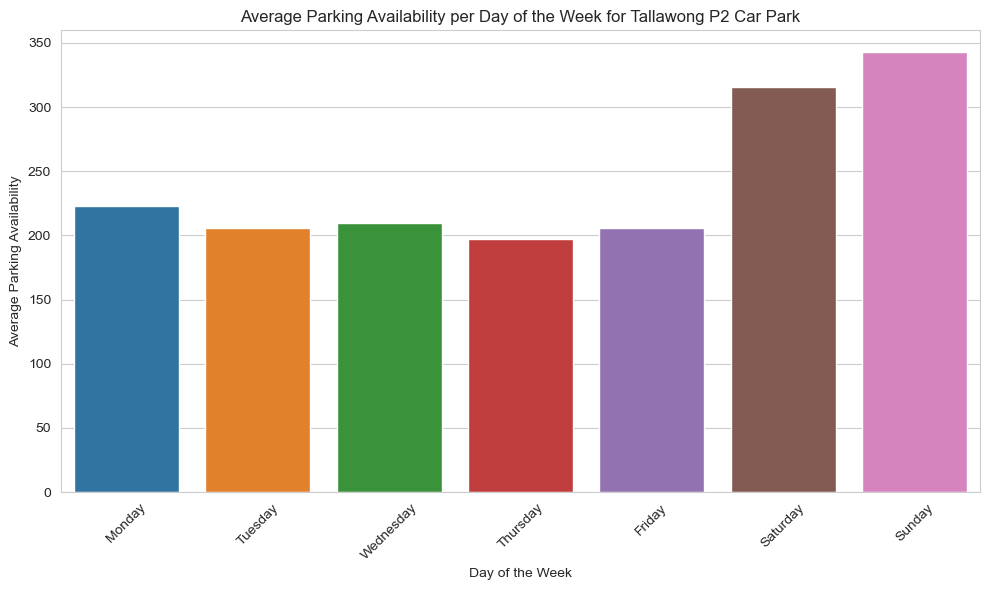

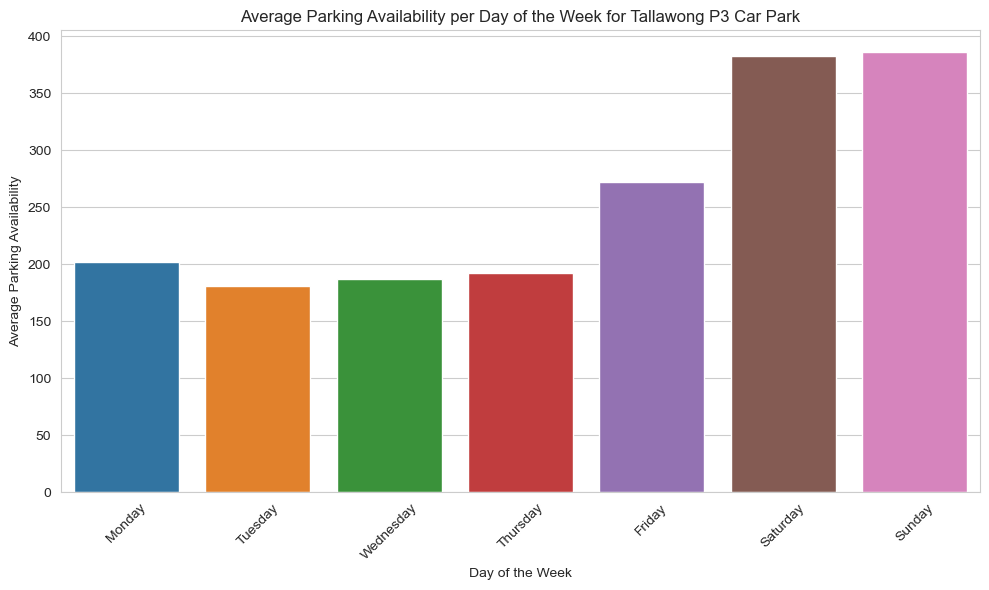

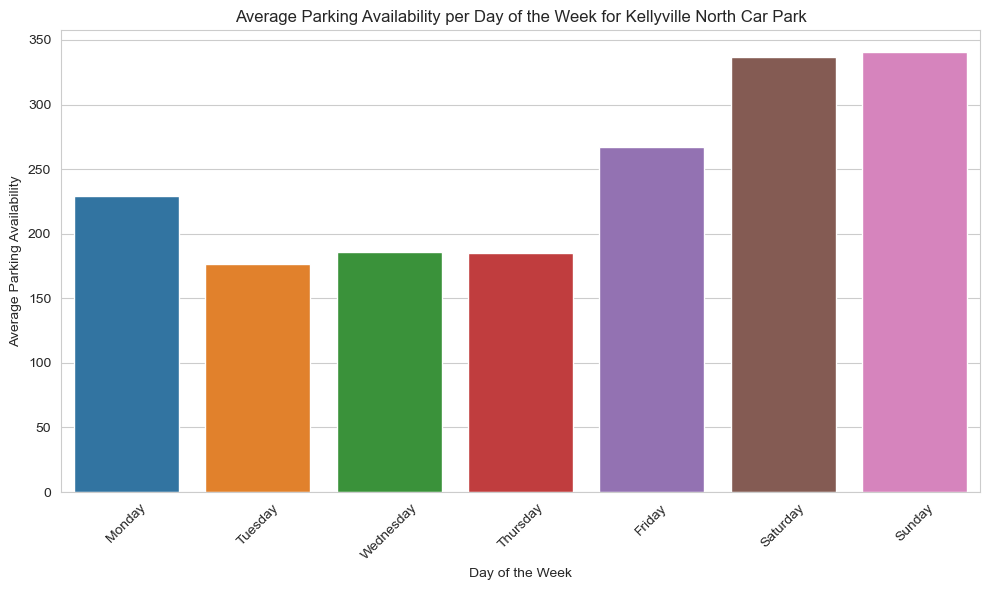

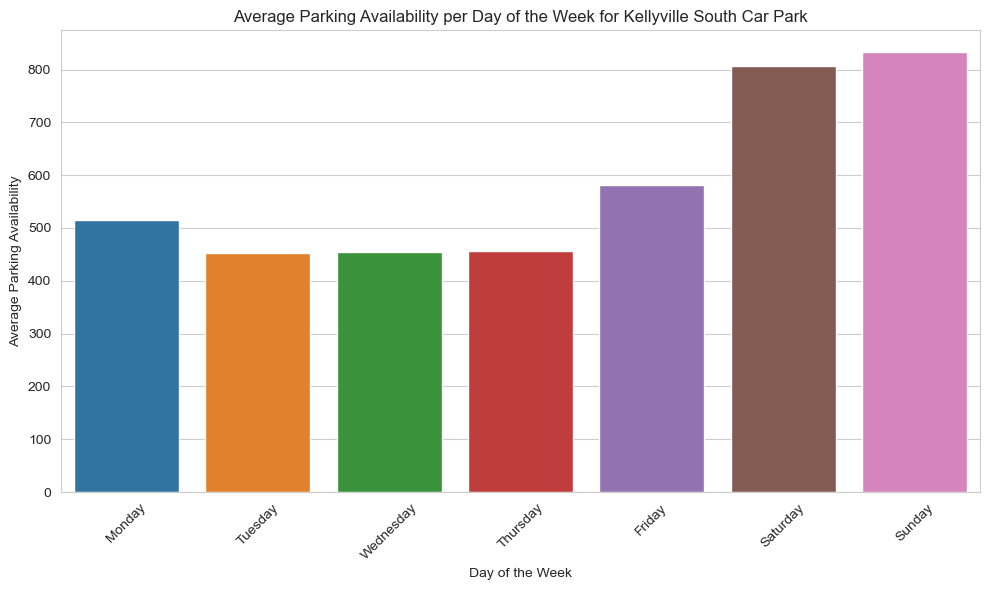

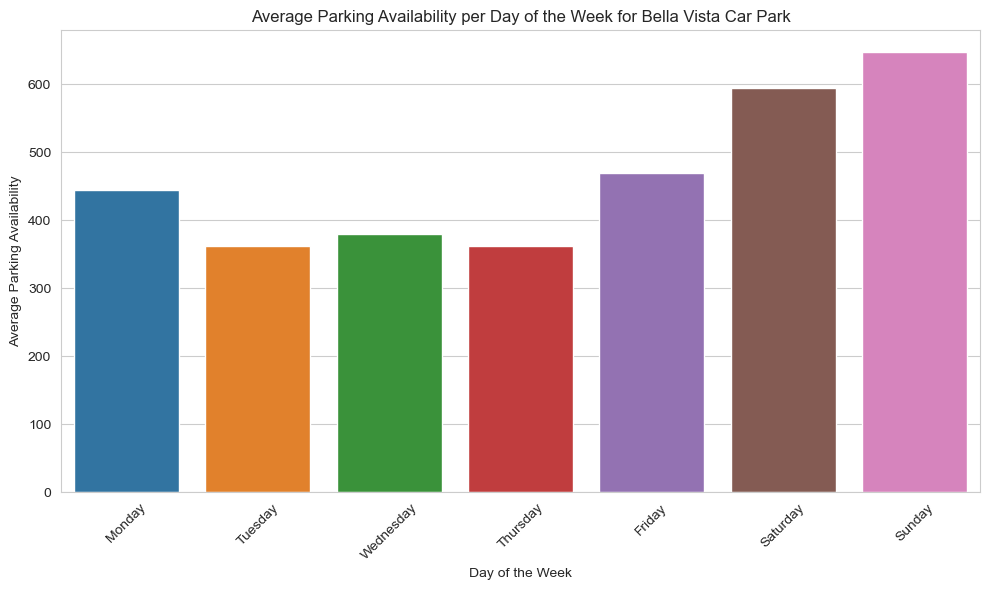

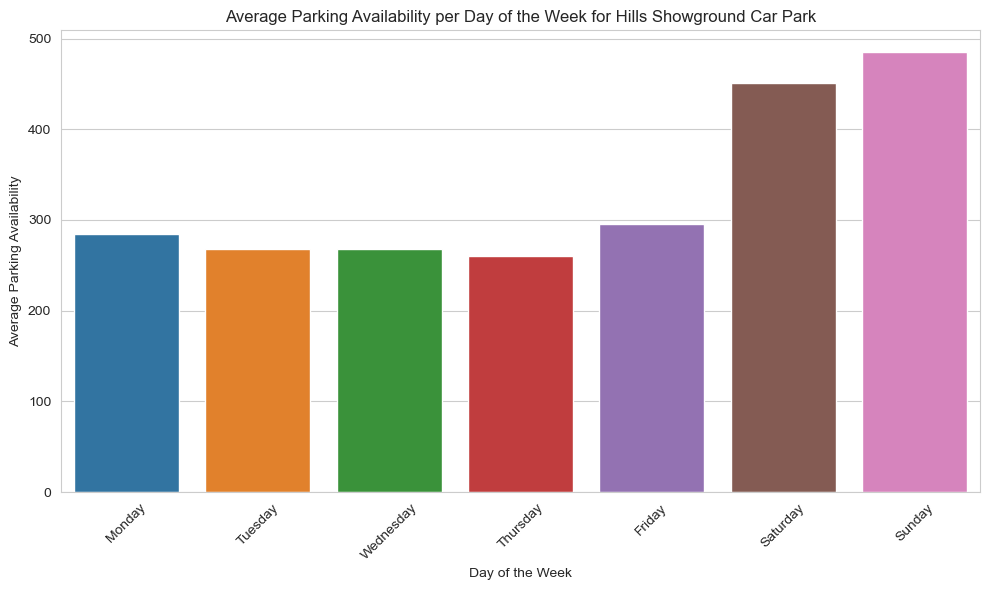

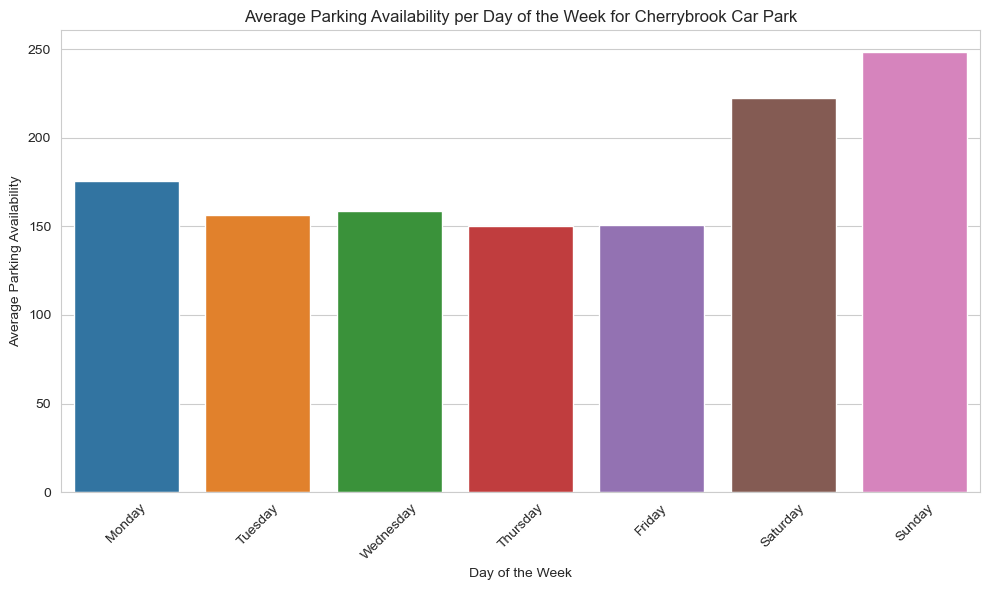

In [47]:
# Convert the 'date' column to datetime format
final_df['date'] = pd.to_datetime(final_df['date'])

# Group by facility name and day of the week, and calculate the mean occupancy total
average_occupancy_per_facility_and_day_of_week = final_df.groupby([final_df['facility_name'], final_df['date'].dt.day_name()])['parking_availability'].mean().reset_index()

# Define the order of the days of the week
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Iterate through each facility name
for facility_name in final_df['facility_name'].unique():
    # Filter data for the current facility
    facility_data = average_occupancy_per_facility_and_day_of_week[average_occupancy_per_facility_and_day_of_week['facility_name'] == facility_name]
    
    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    sns.barplot(x='date', y='parking_availability', data=facility_data, order=days_of_week_order)
    plt.xlabel('Day of the Week')
    plt.ylabel('Average Parking Availability')
    plt.title(f'Average Parking Availability per Day of the Week for {facility_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

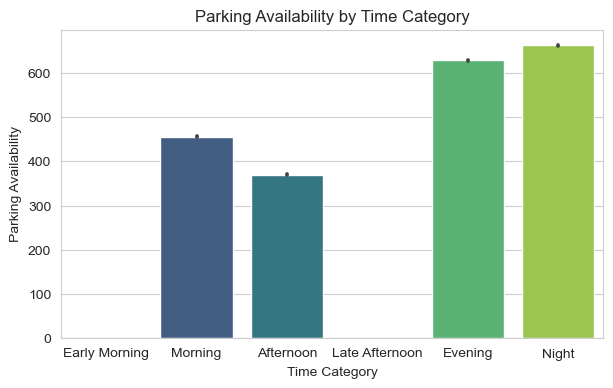

In [48]:
# Bar plot grouped by time category
plt.figure(figsize=(7, 4))

# Order of time category
time_order = ['Early Morning', 'Morning', 'Afternoon', 'Late Afternoon', 'Evening', 'Night']
sns.barplot(x='time_category', y='parking_availability',
            data=processed_df, palette='viridis', order = time_order)
plt.title('Parking Availability by Time Category')
plt.xlabel('Time Category')
plt.ylabel('Parking Availability')
plt.show()

In [8]:
#  #Order by parking availability
# order_by_availability = processed_df.sort_values(by='parking_availability', ascending=False)['facility_name']

# # Bar plot with ordered data
# plt.figure(figsize=(8, 8))
# sns.barplot(y='facility_name', x='parking_availability', order=order_by_availability,
#             data=processed_df, palette='viridis', orient='h')

# plt.title('Parking Availability by Parking Facility')
# plt.xlabel('Parking Availability')
# plt.ylabel('Parking Facility')

# plt.show()

#### Parking Availability by Parking Facility
A horizontal bar plot that visualizes the parking availability for different parking facilities.

In [50]:
# # Create a horizontal bar plot
# plt.figure(figsize=(8, 8))
# sns.barplot(x='parking_availability', y='facility_name',
#             data=processed_df, palette='viridis', order=processed_df.sort_values('parking_availability').facility_name, orient='h')
# plt.title('Parking Availability by Parking Facility')
# plt.xlabel('Parking Availability')
# plt.ylabel('Parking Facility')
# plt.show()

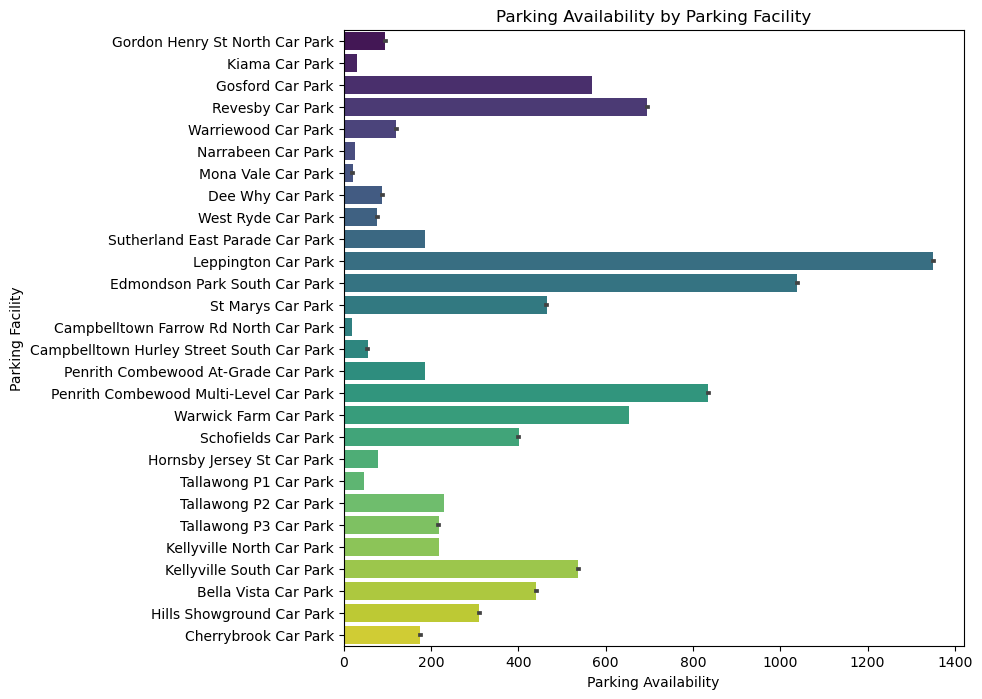

In [6]:
# Bar plot
plt.figure(figsize=(8, 8))
sns.barplot(y='facility_name', x='parking_availability',
            data=processed_df, palette='viridis',orient='h')
plt.title('Parking Availability by Parking Facility')
plt.xlabel('Parking Availability')
plt.ylabel('Parking Facility')
plt.show()

#### Percentage Parking Facility Occupancy

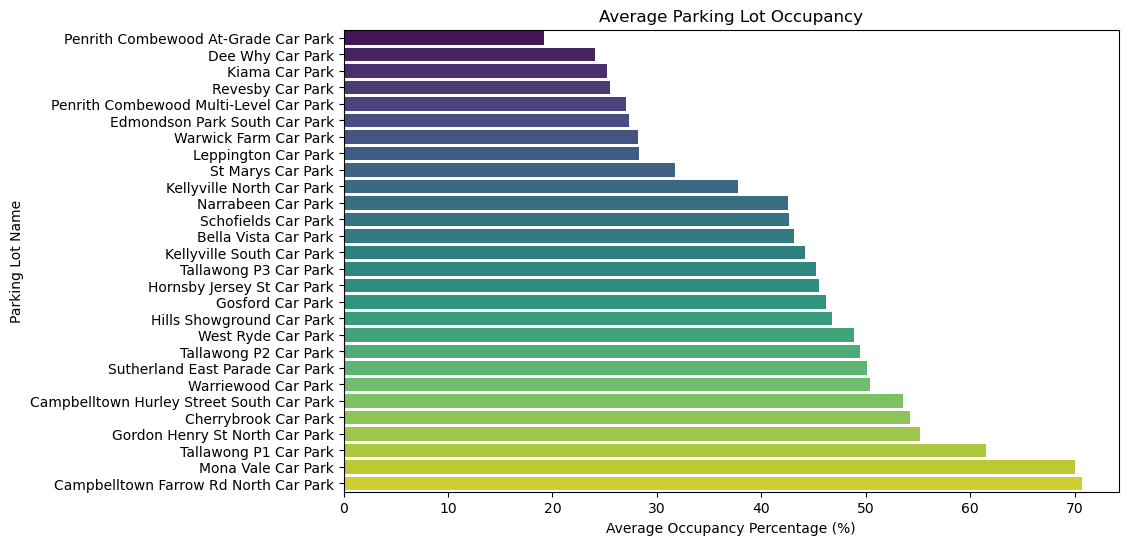

In [19]:
# Calculate the percentage of occupied slots
processed_df['OccupancyPercentage'] = (processed_df['occupancy'] / processed_df['capacity']) * 100

# Group by ParkingLotID and calculate average occupancy percentage
average_occupancy = processed_df.groupby('facility_name')['OccupancyPercentage'].mean().reset_index()

# Sort the DataFrame by average occupancy percentage in ascending order
average_occupancy = average_occupancy.sort_values(by='OccupancyPercentage')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(y = average_occupancy['facility_name'], x = average_occupancy['OccupancyPercentage'],
            data=processed_df, palette='viridis', orient='h')
plt.title('Average Parking Lot Occupancy')
plt.ylabel('Parking Lot Name')
plt.xlabel('Average Occupancy Percentage (%)')
# plt.ylim(0, 100)
plt.show()

Line plot with markers for the capacity and occupancy of each parking lot.

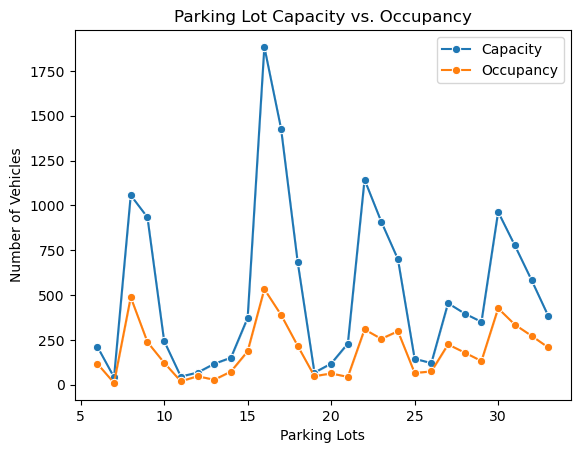

In [8]:
# Plotting the data using Seaborn
sns.lineplot(x='facility_id', y='capacity', data=processed_df, label='Capacity', marker='o')
sns.lineplot(x='facility_id', y='occupancy', data=processed_df, label='Occupancy', marker='o')

# Adding labels and title
plt.xlabel('Parking Lots')
plt.ylabel('Number of Parking Spots')
plt.title('Parking Lot Capacity vs. Occupancy')

# Display the legend
plt.legend()

# Display the plot
plt.show()

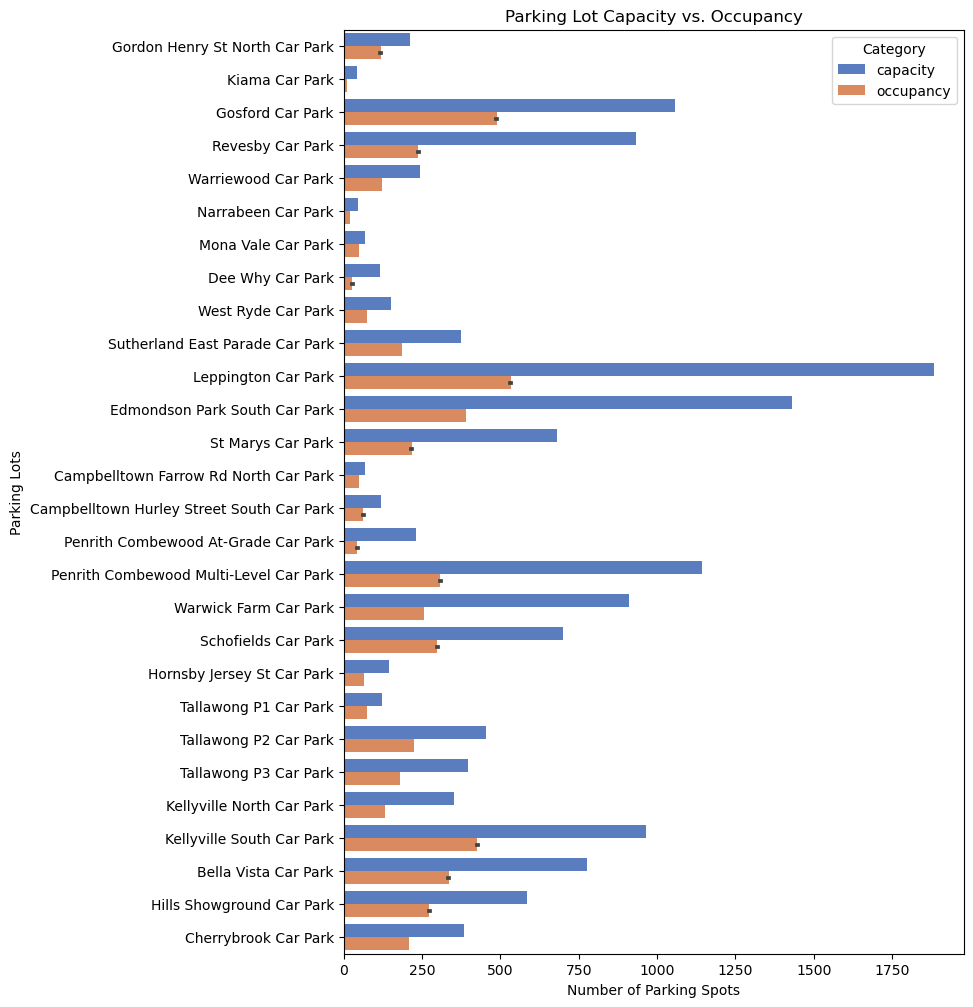

In [15]:

# Melt the DataFrame for Seaborn
df_melted = pd.melt(processed_df[['facility_name', 'capacity','occupancy']], id_vars='facility_name', var_name='Category', value_name='Value')

# Creating a multiple bar plot with Seaborn
plt.figure(figsize=(8, 8))
sns.barplot(y='facility_name', x='Value', hue='Category', data=df_melted, palette='muted', orient='h')

# Adding labels and title
plt.ylabel('Parking Facilities')
plt.xlabel('Number of Parking Spots')
plt.title('Parking Lot Capacity vs. Occupancy')

# Display the legend
plt.legend(title='Category')

# Display the plot
plt.show()

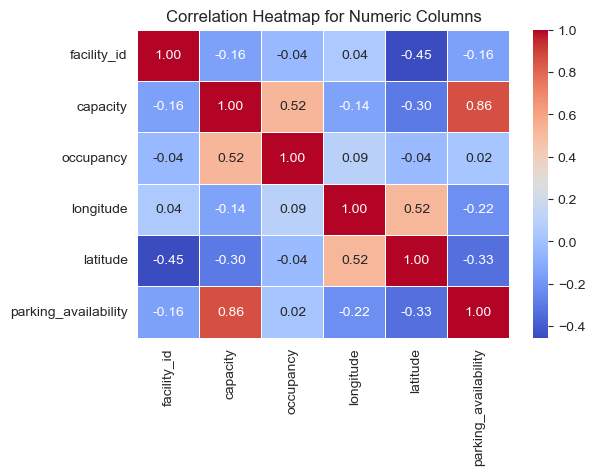

In [55]:
# Filter only numeric columns
numeric_columns = final_df.select_dtypes(include=['float64', 'int64', 'int32'])

# Create a correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(6, 4))
# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# Set the title
plt.title('Correlation Heatmap for Numeric Columns')

# Show the plot
plt.show()

### MULTIVARIATE ANALYSIS

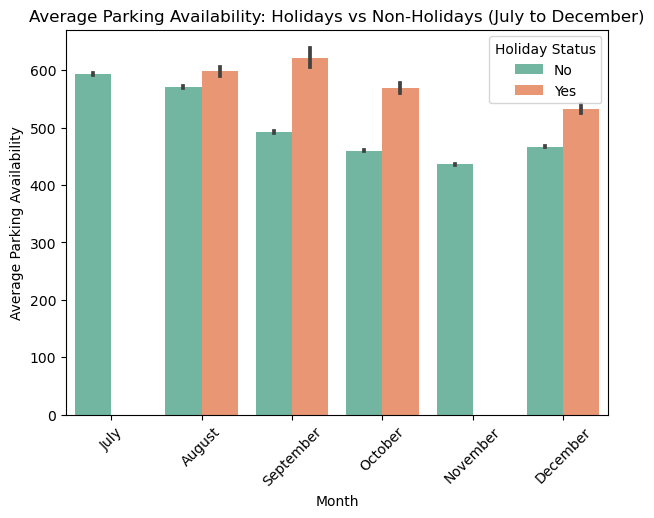

In [29]:
# Filter data for the specified months (July to December)
filtered_df = processed_df

# Create a bar plot with Seaborn
plt.figure(figsize=(7, 5))
sns.barplot(x='month', y='parking_availability', hue='is_holiday', data=filtered_df, palette='Set2', estimator='mean')

# Adding labels and title
plt.title('Average Parking Availability: Holidays vs Non-Holidays (July to December)')
plt.xlabel('Month')
plt.ylabel('Average Parking Availability')
plt.xticks(rotation=45)

# Display the legend
plt.legend(title='Holiday Status')

# Show the plot
plt.show()

In [22]:
# # Create a bar plot for comparison
# plt.figure(figsize=(10, 6))
# bar_width = 0.35
# # processed_df['OccupancyPercentage'] = (processed_df['occupancy'] / processed_df['capacity']) * 100

# # Plotting the bars for occupancy percentage
# plt.bar(processed_df['facility_id'],processed_df['OccupancyPercentage'], width=bar_width, label='Occupancy Percentage', color='skyblue')

# # Plotting the bars for total capacity
# plt.bar(processed_df['facility_id'] + bar_width,processed_df['capacity'], width=bar_width, label='Total Capacity', color='orange')

# plt.title('Comparison of Occupancy Percentage and Total Capacity')
# plt.xlabel('Parking Lot ID')
# plt.ylabel('Values')
# plt.legend()
# plt.show()

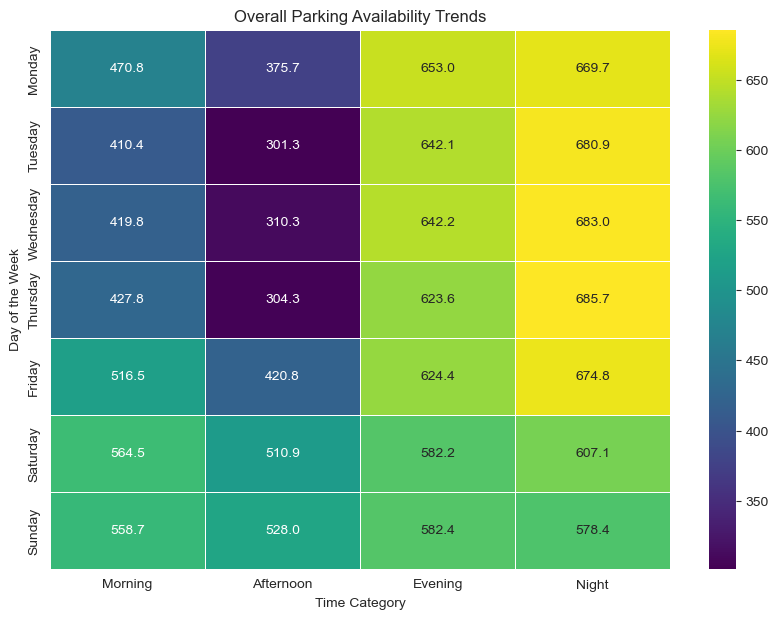

In [53]:
# Create a pivot table for heatmap
heatmap_data = processed_df.pivot_table(
    values='parking_availability', index='day_of_week', columns='time_category', aggfunc='mean')

# Define the order of days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Define the order of time categories
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data.loc[days_order, time_order], annot=True, cmap='viridis', fmt='.1f', linewidths=.5)
plt.title('Overall Parking Availability Trends')
plt.xlabel('Time Category')
plt.ylabel('Day of the Week')
plt.show()

The scatter plot titled “Anomalous Patterns in Parking Availability” displays parking availability over a series of dates. Here are the key details:

The x-axis represents dates, ranging from December 1, 2023 to December 31, 2023.
The y-axis represents parking availability, with values ranging from 0 to 1750.
Blue dots scattered across the plot indicate normal parking availability on various dates.
Red dots represent anomalies, where parking availability is significantly higher than usual.
The legend in the top right corner explains that blue dots are “Normal” and red dots are “Anomalies.”

In [57]:
# Calculate z-scores for parking availability
processed_df['z_score'] = (processed_df['parking_availability'] -
                              processed_df['parking_availability'].mean()) / processed_df['parking_availability'].std()

# Set a threshold for anomaly detection (e.g., z-score greater than 3)
anomaly_threshold = 3
anomalies = processed_df[processed_df['z_score'] > anomaly_threshold]

# Visualize anomalies in a scatter plot
plt.figure(figsize=(20, 6))
sns.scatterplot(x='date', y='parking_availability',
                data=processed_df, label='Normal', color='blue')
sns.scatterplot(x='date', y='parking_availability', data=anomalies, label='Anomalies', color='red', s=100)
plt.title('Anomalous Patterns in Parking Availability')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Parking Availability')
plt.legend()
plt.show()

MemoryError: Unable to allocate 45.1 MiB for an array with shape (2955413, 2) and data type float64

<Figure size 2000x600 with 1 Axes>